In [4]:
# So that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# https://matplotlib.org/stable/users/explain/interactive.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://matplotlib.org/ipympl/installing.html 
%matplotlib widget

import functions 
from importlib import reload
reload(functions)
from functions import *
plt.close('all')

Initialisation
Initialisation


## Functions

### FAS

In [ ]:
# open c3d files
path = "C:\\Users\\Anais\\Documents\\test_anais 20.06\\test_Anais_07.c3d"
c,point_data,points_residuals,analog_data = read_c3d(path)


In [ ]:
df_emgs = extract_channels_c3d(c,analog_data, file_path = '', save = False, replace = False)
df_emgs

In [ ]:
# quick analysis
_ = emply_value_evaluate(df_emgs['L_RF'],show=True)

In [ ]:
df_emgs = df_emgs.dropna()

In [ ]:
df_emgs

#### Fas

In [ ]:
# open c3d files
path = "C:\\Users\\Anais\\Documents\\test_anais 20.06\\test_Anais_07.c3d"
c,point_data,points_residuals,analog_data = read_c3d(path)
df_emgs = extract_channels_c3d(c,analog_data, file_path = '', save = False, replace = False)
df_emgs = df_emgs.dropna()
emg_ = df_emgs['L_RF']

In [ ]:
plt.close('all')

In [ ]:
plt.close('all')
fig,ax = plt.subplots(3,3,figsize =(15,10))

i = 0
# n = [3,10,50]
#nI : 1,2,3
# n = 3
# L=0.005 #[0.01,0.005,0.0001]
k = 2 #[2,5,8]
for n in [10,3,1]:
    j=0
    for L in [0.1,0.5,0.0001]:
        emg = mean_removal(emg_.copy(deep=True))
        emg_inter = fas_filter(emg.copy(),L=L, nq_min = n,k=k)
    
        # ax[i,j].set_xlim([10,5000])
        ax[i,j].set_xlim([1000,2500])

        ax[i,j].set_ylim([-0.02,0.02])

        # ax[i,j].set_ylim([-0.07,0.07])

        ax[i,j].plot(mean_removal(emg_),alpha=0.5,color='cyan')
        ax[i,j].plot(emg_inter,alpha=0.95,color='blue')
        ax[i,j].set(title = f' L:{L},k:{k},n:{n}')
        j += 1


    i += 1

fig.tight_layout()

In [ ]:
plt.close('all')


In [ ]:
path = "C:\\Users\\Anais\\Documents\\presentation images\\FAS comparison\\nIII_LII_kI\\"


for lim in ['zoomed','x']:
    i = 0
    j=0
    for k in [2,3,4]:
        plt.close('all')
        fig,ax = plt.subplots(3,3,figsize =(35,20))
        i = 0
        j=0
        for L in [0.1,0.05,0.0001]:
            j=0

            for n in [2,4,6]:
                    
                emg = mean_removal(emg_.copy(deep=True))
                emg_inter = fas_filter(emg,L=L, nq_min = n,k=k)
                if lim == 'zoomed':
                    ax[i,j].set_xlim([10,5000])
                    ax[i,j].set_ylim([-0.02,0.02])
                else:
                    ax[i,j].set_ylim([-0.07,0.07])

                ax[i,j].plot(mean_removal(emg_),alpha=0.5,color='cyan')
                ax[i,j].plot(emg_inter,alpha=0.95,color='blue')
                ax[i,j].set(title = f' L:{L},k:{k},n:{n}')
                j += 1
                # Smoothing with Savitzky-Golay filter
             
                        # ax[i,j].set_xlim(left=0, right=5000)
                        # ax[i,j].set_ylim(bottom=-0.02, top=0.02)
            i += 1
        fig.tight_layout()
        if not exists(path):
            os.mkdir(path)
        fig.savefig(path + f'{k}Ln_{lim}.png')
        print(f'{k}Ln_{lim}.png')


            

                

In [ ]:
t = np.arange(0,10,1/200)
y = np.sin(t*2*50*np.pi) 
y2 = [[np.sin(t*2*(47+i)*np.pi) *0.6] for i in range(0,7)]
y3 = np.sum(y2,axis=)
fig,ax = plt.subplots(figsize = (6,2))
ax.plot(t,y)

In [ ]:
randomSignal = np.random.randn(len(t))


In [ ]:
fig,ax = plt.subplots(figsize = (6,2))
ax.plot(t,randomSignal,t,y)

In [ ]:
singal_noise = randomSignal + y
fig,ax = plt.subplots(figsize = (6,2))
ax.plot(t,randomSignal)
ax.plot(t,singal_noise, alpha = 0.6)

#### More examples with and without ECG artifact

In [ ]:
plt.close('all')


In [ ]:
def plot_ecg_clean_ftt(files_list,files_clean):
  
    fig,ax =plt.subplots( nrows=3, ncols=2,figsize = (13,10))
    i=0
        
    i2,f2 = next(files_clean.iterrows())

    for t,f in files_list.iterrows():
        f2 = files_clean.iloc[i]

        subject = f['subject']
        task = f['task']
        session = f['session']
        trial = 1
        muscles = [f['channel']]
        emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
        emg_c = load_file_subject_mvt_session2(f2['subject'],f2['task'],f2['session'],n=trial)[f2['channel']]
        

        freq,amp = fft_function(emg,freq_0=False)
        freqc,ampc = fft_function(emg_c,freq_0=False)

        ax[i,0].plot(freq,amp/np.max(amp),label=f'{muscles[0]}_ecg',color='orange', alpha = 0.7)
        ax[i,0].plot(freqc,ampc/np.max(ampc),label=f'{muscles[0]}_clean',alpha = 0.7)

        ax[i,1].plot(freq,amp,label=f'{muscles[0]}_ecg',color='orange', alpha = 0.7)
        ax[i,1].plot(freqc,ampc,label=f'{muscles[0]}_clean',alpha = 0.7)

        ax[i,0].set(title='normalized')
        ax[i,1].set(title='not normalized')
        ax[i,0].set_xlim([10,50])
        ax[i,1].set_xlim([10,50])
        ax[i,1].legend()
        ax[i,0].legend()

        i += 1

    fig.tight_layout()


In [ ]:
def plot_fas_bw_ftt(files_list):
    fig,ax =plt.subplots( nrows=3, ncols=2,figsize = (13,10))
    i=0
    for t,f in files_list.iterrows():
        subject = f['subject']
        task = f['task']
        session = f['session']
        trial = 1
        muscles = [f['channel']]
        emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
        filtered_bw = butterfilter(mean_removal(emg),c_f=30, order = 2, type='highpass')
        # filtered_bw = comb_filter( butterfilter(mean_removal(emg),c_f=30, order = 2, type='highpass')[:len(emg)//2], f0=60,ft=500)

        filtered_fas = fas_filter(mean_removal(emg), k=2, L=10,nq_min=10)
        freq,amp = fft_function(emg,freq_0=False)

        bw_freq,bw_amp = fft_function(filtered_bw,freq_0=False)
        fas_freq,fas_amp = fft_function(filtered_fas,freq_0 = False)
        ax[i,0].plot(freq,amp,color='cyan',alpha = 0.4)
        ax[i,0].plot(fas_freq,fas_amp,label=muscles[0])
        ax[i,1].plot(freq,amp,color='cyan',alpha = 0.4)
        ax[i,1].plot(bw_freq,bw_amp,label=muscles[0])

        ax[i,0].set(title='FAS')
        ax[i,1].set(title='BW HPF 30')
        # ax[i,0].set_xlim([20,40])
        # ax[i,1].set_xlim([20,40])
        ax[i,1].legend()
        ax[i,0].legend()

        i += 1
    
    fig.tight_layout()


In [ ]:
def plot_fas_bw(files_list):
    fig,ax =plt.subplots( nrows=3, ncols=2,figsize = (13,10))
    i = 0
    for t,f in files_list.iterrows():
        subject = f['subject']
        task = f['task']
        session = f['session']
        trial = 1
        muscles = [f['channel']]
        emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
        filtered_bw = butterfilter(mean_removal(emg),c_f=30, order = 2, type='highpass')[:len(emg)//2]

        filtered_fas = fas_filter(mean_removal(emg), k=2, L=10,nq_min=10)[:len(emg)//2]
        ax[i,0].plot(emg[:len(emg)//2],color = 'cyan', alpha = 0.3)
        ax[i,1].plot(emg[:len(emg)//2],color = 'cyan', alpha = 0.3)
        ax[i,0].plot(filtered_fas,label = muscles[0])
        ax[i,1].plot(filtered_bw,label = muscles[0])


        ax[i,0].set(title='FAS')
        ax[i,1].set(title='BW HPF 30')
        ax[i,0].set_ylim([-0.05,0.05])
        ax[i,1].set_ylim([-0.05,0.05])
        ax[i,0].legend(loc='upper right')
        ax[i,1].legend(loc='upper right')
        i += 1
    fig.tight_layout()


In [ ]:
df_excluded_csv = pd.read_csv('results\excluded.csv')
files = df_excluded_csv.loc[(df_excluded_csv['task'] == 'Posture_Sitting') & (df_excluded_csv['channel'] == 'L_ESI'),: ]
files_ecg = files.loc[files['noise']==7,:]
files_clean = files.loc[files['noise']==1, :]

In [ ]:
df_excluded_csv = pd.read_csv('results\excluded.csv')
files = df_excluded_csv.loc[(df_excluded_csv['task'] == 'Perturbation_R_Shoulder') & (df_excluded_csv['channel'] == 'L_EO') ]
files_ecg = files.loc[files['excluded']==1,:][:3]
files_clean = files.loc[files['noise']==1, :]
files

In [ ]:
plt.close('all')

In [ ]:
plot_fas_bw(files_ecg)

In [ ]:
plot_fas_bw(files_clean)

In [ ]:
plot_fas_bw_ftt(files_clean)


In [ ]:
plot_ecg_clean_ftt(files_ecg,files_clean)


### Event detection

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
event = load_event_subject_mvt_session2(subject,task,session,n=trial)
event_line = extract_event(emg,event,show=True,event_type=event_type)

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Gait_Normal'
muscles = ['L_LES','R_LES']
event_type = 'Gait'
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
event = load_event_subject_mvt_session2(subject,task,session,n=trial)
event_line = extract_event(emg,event,show=True,event_type=event_type)

In [ ]:
BMu_nb = 36

#one subject test
subject = 3
session = 'INI'
trial = 1

# BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = [BMu1,preprocessing_ahern_1988,['L_LES','R_LES'],'Weight_Unconstrained',False,'',False,True,'',{}]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict[f'BMu{str(BMu_nb)}']
print(BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs)

emg = load_file_subject_mvt_session2(subject,task,session,n=1)[muscles[0]]

kwargs = {}
plot_1_channel_emg(emg)
event = load_event_subject_mvt_session2(subject,task,session)
event_line = extract_event(emg,event,event_type=event_type ,show=True)

In [ ]:
event

In [ ]:
df_extracted_event = event_extraction_flex_return(emg,event)
df_extracted_event

In [ ]:
plot_event_extraction(emg,df_extracted_event,figs = (6,3),xl='time',yl='Amplitude',plot_title='Emg and subphases')

In [ ]:
df_emg_subphases = event_segmentation_from_df_time(emg,df_extracted_event)

In [ ]:
type(df_emg_subphases.loc[1,'emg'])

In [ ]:
len(df_emg_subphases.loc[0,'emg'])

In [ ]:
df_emg_subphases

In [ ]:
df_emg_subphases['value'] = df_emg_subphases.apply(lambda x: np.mean(x['emg']) if x['event'] == 'start_standing' or x['event'] == 'start_flexion' 
                                                   else [np.mean(x['emg'][i + int(len(x['emg'])/4):i + 1 + int(len(x['emg'])/4)]) for i in range(4) ] , axis=1)

### Double threshold

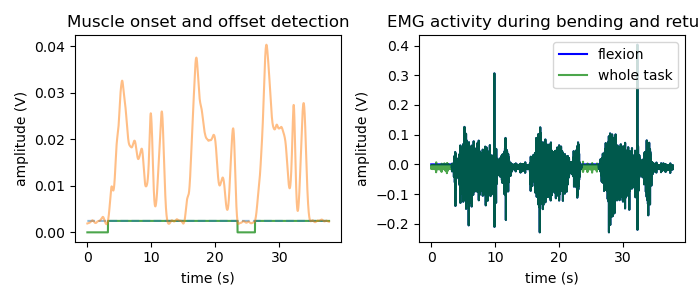

In [5]:
from processing.Lima_2018 import processing
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]


def plot_contraction(emg,processing,win_ = 2, time_win_ = 1,number_mean_= 1, number_std_ = 1):    
    emg_contraction = processing(emg)
    output, state_contraction, threshold_amp, number_onset_offset = double_threshold(emg_contraction,win = win_, time_win = time_win_,number_mean= number_mean_, number_std = number_std_,baseline = [])
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,3))
    t1 = np.arange(len(emg_contraction))/SAMPLING_RATE
    ax1.plot(t1, state_contraction*threshold_amp,alpha = 0.7,color = 'green')
    ax1.plot(t1,np.ones_like(t1)*threshold_amp, alpha = 0.5, linestyle='--')
    ax1.plot(t1, emg_contraction,alpha = 0.5)
    ax1.set(xlabel='time (s)', ylabel='amplitude (V)', title ='Muscle onset and offset detection')

    emg_on = emg.copy()
    emg_on[state_contraction==0] = 0
    ax2.plot(np.arange(len(emg_contraction))/SAMPLING_RATE,emg_on, color = 'blue', label= 'flexion')
    ax2.plot(np.arange(len(emg_contraction))/SAMPLING_RATE, emg,alpha = 0.7,color = 'green', label = 'whole task')
    ax2.set(xlabel='time (s)', ylabel='amplitude (V)', title ='EMG activity during bending and return')
    ax2.legend()

    fig.tight_layout()
    return output, state_contraction, threshold_amp, number_onset_offset

output, state_contraction, threshold_amp, number_onset_offset =plot_contraction(emg,processing)

In [6]:
output, state_contraction, threshold_amp, number_onset_offset

({0: 0, 3212: 1, 23451: 0, 26185: 1},
 array([0., 0., 0., ..., 1., 1., 1.]),
 0.002455756010276696,
 array([1., 1., 1., ..., 2., 2., 2.]))

### FILTFILT, LFILTER, FIR

#### Filter comparison (FIR, BW, dual pass)

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# https://www.geeksforgeeks.org/plot-the-phase-spectrum-in-python-using-matplotlib/
# Generate a noisy signal to be filtered:


rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08
# Create an order 3 lowpass butterworth filter:

b, a = signal.butter(3, 0.05)
# Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
# Apply the filter again, to have a result filtered at an order the same as filtfilt:

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
# Use filtfilt to apply the filter:

y = signal.filtfilt(b, a, xn)
# Plot the original signal and the various filtered versions:

fig,ax = plt.subplots(1,2,figsize = (10,3))
ax[0].plot(t, xn, 'b', alpha=0.75)
ax[0].plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
ax[0].legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
ax[0].grid(True)

t1,a1,l1=plt.phase_spectrum(xn)
t2,a2,l2 = plt.phase_spectrum(z)
t3,a3,l3 = plt.phase_spectrum(z2)
t4,a4,l4 = plt.phase_spectrum(y)

ax[1].legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
ax[1].grid(True)
fig.tight_layout()


In [ ]:
def lag_finder(y1, y2, sr,show=False):
    # https://stackoverflow.com/questions/41492882/find-time-shift-of-two-signals-using-cross-correlation
    n = len(y1)

    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    if show:
        print('y2 is ' + str(delay) + ' behind y1')

        plt.figure()
        plt.plot(delay_arr, corr)
        plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
        plt.xlabel('Lag')
        plt.ylabel('Correlation coeff')
    
        plt.show()
    return delay

In [ ]:
def fft_function_test(signal, ax,freq_0 = False, show = True ,signal_2=None, diff = False,title_= ''):
    signal = np.array(signal)
    N = len(signal)
    normalize = N/2
    fourier = fft(signal)
    sampling_rate = SAMPLING_RATE
    frequency_axis = fftfreq(N, d=1.0/sampling_rate)
    norm_amplitude = np.abs(fourier)/normalize *2

    if freq_0:
        positive_freq = frequency_axis>=0
    else:
        positive_freq = frequency_axis>0

    if diff:
        signal = np.array(signal_2)
        N = len(signal_2)
        normalize = N/2
        fourier = fft(signal_2)
        sampling_rate = SAMPLING_RATE
        frequency_axis = fftfreq(N, d=1.0/sampling_rate)
        norm_amplitude_2 = np.abs(fourier)/normalize

        if freq_0:
            positive_freq_2 = frequency_axis>=0
        else:
            positive_freq_2 = frequency_axis>0

        ax.plot(frequency_axis[positive_freq],norm_amplitude[positive_freq]- norm_amplitude_2[positive_freq_2])
        ax.set(title = title_)
        return 0
        
    # Plot the results
    if show :
        
        ax.plot(frequency_axis[positive_freq], norm_amplitude[positive_freq])
        ax.set(title = title_)


    
    return frequency_axis[positive_freq], norm_amplitude[positive_freq]

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
emg = full_wave( mean_removal(emg))

fig, ax = plt.subplots(nrows=12,ncols=4,sharex=False, figsize = (10,25))
order = [2,4,8,14]
t = np.arange(len(emg))
for i in range (4):

    impulse = np.zeros(1000)
    impulse[500] = 1

    b, a = signal.butter(order[i], [30,300], 'bandpass', output='ba', fs=SAMPLING_RATE)
    bd, ad = signal.butter(order[i]//2, [30,300], 'bandpass', output='ba', fs=SAMPLING_RATE)

    w, h = signal.freqz(b, a)
    
    c_f = 30

    imp_ff = signal.filtfilt(b, a, impulse)
    # Applies filter forward in time twice (for same frequency response)
    imp_lf = signal.lfilter(b, a, impulse)
    imp_lflf = signal.lfilter(b, a, signal.lfilter(b, a, impulse))
    # ax[0][i].semilogx(w, 20 * np.log10(abs(h)))
    ax[0][i].semilogx(20*np.log10(np.abs(rfft(imp_ff))),label='ff')
    ax[0][i].semilogx(20*np.log10(np.abs(rfft(imp_lf))),'--',label='lf')
    ax[0][i].semilogx(20*np.log10(np.abs(rfft(imp_lflf))),'-.',label='lflf')
    ax[0][i].legend()

    ax[0][i].set(title = f'BW order{order[i]}',xlabel ='Frequency [radians / second]',ylabel = 'Amplitude [dB]')
    ax[0][i].grid(which='both', axis='both')
    ax[0][i].axvline(30, color='green') # cutoff frequency


    # zi = signal.lfilter_zi(b, a)
    filtered_d = signal.filtfilt(bd,ad,emg)
    ax[1][i].plot(t,emg,color = 'cyan')
    ax[1][i].plot(t,filtered_d,color = 'blue',alpha=0.7)
    ax[1][i].set(title = 'filtfilt')


    filtered_s = signal.lfilter(b, a, emg)
    ax[2][i].plot(t,emg,color = 'cyan')
    ax[2][i].plot(t,signal.lfilter(b, a, emg),color = 'blue',alpha=0.7)
    ax[2][i].set(title = 'lfilter')


    filtered_ds = signal.lfilter(bd, ad, signal.lfilter(bd, ad, emg))
    ax[3][i].plot(t,emg,color = 'cyan')
    ax[3][i].plot(t,filtered_ds,color = 'blue',alpha=0.7)
    ax[3][i].set(title = 'lfilter x2')


    filtered_bpf = butterfilter_bandpass(emg,order[i]//2,c_f,300) #sosfilt
    ax[4][i].plot(t,emg,color = 'cyan')
    ax[4][i].plot(t,filtered_bpf,color = 'blue',alpha=0.7)
    ax[4][i].set(title = 'BPF lf')

    filtered_bpff = butterfilter_bandpass(butterfilter_bandpass(emg,order[i]//2,c_f,300),order[i]//2,30,300) #sosfilt
    ax[5][i].plot(t,emg,color = 'cyan')
    ax[5][i].plot(t,filtered_bpff,color = 'blue',alpha=0.7)
    ax[5][i].set(title = 'BW lf x2')



    fft_function_test(filtered_d,ax[6][i], title_ = 'filtfilt')
    fft_function_test(filtered_s,ax[7][i], title_ = 'lfilter')
    fft_function_test(filtered_ds,ax[8][i], title_ = 'lfilter x2')

    spec_d =ax[9][i].phase_spectrum(filtered_d,Fs = SAMPLING_RATE)
    spec = ax[9][i].phase_spectrum(emg,Fs = SAMPLING_RATE)
    ax[9][i].set(title = f'filtfilt : ' + str(np.round(lag_finder(emg,filtered_d,SAMPLING_RATE)*1000, 4)) + ' ms' + f'\n{np.mean(spec_d[0]-spec[0]):3.3f}')


    spec_s = ax[10][i].phase_spectrum(filtered_s,Fs = SAMPLING_RATE)
    spec = ax[10][i].phase_spectrum(emg,Fs = SAMPLING_RATE)
    ax[10][i].set(title = 'lfilt : '  + str(np.round(lag_finder(emg,filtered_s,SAMPLING_RATE)*1000, 4)) + ' ms' + f'\n{np.mean(spec_s[0]-spec[0]):3.3f}')


    spec_ds = ax[11][i].phase_spectrum(filtered_ds,Fs = SAMPLING_RATE)
    spec = ax[11][i].phase_spectrum(emg,Fs = SAMPLING_RATE)
    ax[11][i].set(title = 'lfilt x2 : '  + str(np.round(lag_finder(emg,filtered_ds,SAMPLING_RATE)*1000, 4)) + ' ms' + f'\n{np.mean(spec_ds[0]-spec[0]):3.3f}')

    for j in range(1,6):
        ax[j][i].set_xlim(11000,13000)
        ax[j][i].set_ylim(-0.1,0.3)



fig.tight_layout()
plt.show()

#### FIR filter

In [ ]:
def fir_filter_test(emg,c_f,nb_taps, type, s_f = SAMPLING_RATE):
    assert not empty_value_check(emg),'Empty values emg filter'
    assert type in ['lowpass', 'highpass'], 'type of filter not valid'
 
    b = firwin(nb_taps, c_f, pass_zero=type, fs=s_f)

    # Use lfilter to filter x with the FIR filter.
    filtered_emg = signal.lfilter(b,1, emg)

    return filtered_emg

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
filtered_emg = fir_filter_test(emg,c_f=30,nb_taps=20, type='lowpass', s_f = SAMPLING_RATE)
plot_2_channel_emg(emg,filtered_emg,title='FIR filter')
filter_bw = butterfilter(emg,8,40)
plot_2_channel_emg(emg,filter_bw,title='BW filter')

### rectification and filters

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
emg_rec = full_wave( mean_removal(emg) )
plot_2_channel_emg(emg,emg_rec)

#### Effects of full wave or "semi" wave rectification have on the emg sprectrum

In [ ]:
freq_emg,amp_emg = fft_function(emg,freq_0=False)
freq_rec,amp_rec = fft_function(emg_rec, freq_0=False)
emg_demi = emg.copy()
emg_demi[emg_demi<0]=0
freq_semi,amp_semi = fft_function(emg_demi,freq_0=False)
plot_2_spectrum(freq_rec,amp_rec,freq_emg,amp_emg, l1='rec',l2='original' )
plot_2_spectrum(freq_semi,amp_semi,freq_emg,amp_emg, l1='semi',l2='original' )
plot_2_spectrum(freq_semi,amp_semi,freq_rec,amp_rec, l1='semi',l2='full' )

In [ ]:
fig,ax = plt.subplots(figsize = (6,2))
ax.phase_spectrum(emg,Fs=SAMPLING_RATE,label='emg')
ax.phase_spectrum(emg_rec,color = 'orange',Fs=SAMPLING_RATE,label='rectified')
ax.phase_spectrum(emg_demi,color='green',Fs=SAMPLING_RATE,label ="'semi' rectified")
ax.legend()
fig.tight_layout()

how much the differencies in phase change the output signal ?
is the sprectrum less changed if the full wave is applied after the removal of artefacts ?

In [ ]:
res_rec = signal.correlate(amp_emg,amp_rec)
lags_rec = signal.correlation_lags(len(amp_emg), len(amp_rec))

res_demi = signal.correlate(amp_emg,amp_semi)
lags_semi = signal.correlation_lags(len(amp_emg), len(amp_semi))


In [ ]:
lags_rec,lags_semi

In [ ]:
plot_multiple(amp_emg,amp_rec,amp_semi,[],[],res_rec,res_demi)

In [ ]:
fig,ax = plt.subplots(figsize = (6,2))
ax.plot(lags_rec,res_rec/np.max(res_rec))
ax.plot(lags_semi,res_demi/np.max(res_demi))

In [ ]:
lags_rec[np.argmax(res_rec)],lags_semi[np.argmax(res_demi)]

If the amplitude are shifter from 610 frequency could it change smt when the signal is reconstructed ?

#### Effects of different filters on a rectified signal

In [ ]:
low,high = 2,400
ord2=4
ord=2
emg_bandpass = butterfilter_bandpass(emg,order=ord2,c_f_high=high,c_f_low=low)
emg_bandpass_filter = butterfilter(emg,order=ord2,c_f=high, type='lowpass')
emg_bandpass_filter_2 = butterfilter(emg,order=ord2,c_f=low,type='highpass')

emg_rec1 = butterfilter_bandpass(emg_rec,order=ord2,c_f_high=high,c_f_low=low)
emg_rec2 = butterfilter(emg_rec,order=ord2,c_f=high, type='lowpass')
emg_rec4 = butterfilter(emg_rec,c_f=low,order=ord2,type='highpass')
emg_rec3 = butterfilter(emg_rec2,order=ord2,c_f=low,type='highpass')

#low order dual
emg_rec11 = butterfilter_bandpass_dual(emg_rec,order=ord,c_f_high=high,c_f_low=low)
emg_rec21 = butterfilter_dual(emg_rec,order=ord,c_f=high, type='lowpass')
emg_rec41 = butterfilter_dual(emg_rec,c_f=low,order=ord,type='highpass')
emg_rec31 = butterfilter_dual(emg_rec21,order=ord,c_f=low,type='highpass')

#low order dual step inversion
emg_rec12 = butterfilter_bandpass_dual(emg_rec,order=ord,c_f_high=high,c_f_low=low)
emg_rec22 = butterfilter_dual(emg_rec,order=ord,c_f=high, type='lowpass')
emg_rec42 = butterfilter_dual(emg_rec,c_f=low,order=ord,type='highpass')
emg_rec32 = butterfilter_dual(emg_rec42,order=ord,c_f=high,type='lowpass')

# higher order dual
emg_rec13 = butterfilter_bandpass_dual(emg_rec,order=ord,c_f_high=high,c_f_low=low)
emg_rec23= butterfilter_dual(emg_rec,order=ord2,c_f=high, type='lowpass')
emg_rec43 = butterfilter_dual(emg_rec,c_f=low,order=ord2,type='highpass')
emg_rec33 = butterfilter_dual(emg_rec43,order=ord2,c_f=high,type='lowpass')

# emg_rec13 = butterfilter_bandpass_dual(emg_demi,order=ord,c_f_high=high,c_f_low=low)
# emg_rec23= butterfilter_dual(emg_demi,order=ord2,c_f=high, type='lowpass')
# emg_rec43 = butterfilter_dual(emg_demi,c_f=low,order=ord2,type='highpass')
# emg_rec33 = butterfilter_dual(emg_rec43,order=ord2,c_f=high,type='lowpass')

In [ ]:
plot_multiple(*[emg_bandpass,emg_bandpass_filter,emg_bandpass_filter_2,[],emg_rec1,emg_rec2,emg_rec4,emg_rec3,emg_rec11,emg_rec21,emg_rec41,emg_rec31,emg_rec12,emg_rec22,emg_rec42,emg_rec32,
              emg_rec13,emg_rec23,emg_rec43,emg_rec33])

In [ ]:
low,high = 2,400
ord2=2
ord=1
emg_bandpass = butterfilter_bandpass(emg,order=ord2,c_f_high=high,c_f_low=low)
emg_bandpass_filter = butterfilter(emg,order=ord2,c_f=high, type='lowpass')
emg_bandpass_filter_2 = butterfilter(emg,order=ord2,c_f=low,type='highpass')

bemg_rec1 = butterfilter_bandpass(emg,order=ord2,c_f_high=high,c_f_low=low)
bemg_rec2 = butterfilter(emg,order=ord2,c_f=high, type='lowpass')
bemg_rec4 = butterfilter(emg,c_f=low,order=ord2,type='highpass')
bemg_rec3 = butterfilter(emg_rec2,order=ord2,c_f=low,type='highpass')

#low order dual
bemg_rec11 = butterfilter_bandpass_dual(emg,order=ord,c_f_high=high,c_f_low=low)
bemg_rec21 = butterfilter_dual(emg,order=ord,c_f=high, type='lowpass')
bemg_rec41 = butterfilter_dual(emg,c_f=low,order=ord,type='highpass')
bemg_rec31 = butterfilter_dual(emg_rec21,order=ord,c_f=low,type='highpass')

#low order dual step inversion
bemg_rec12 = butterfilter_bandpass_dual(emg,order=ord,c_f_high=high,c_f_low=low)
bemg_rec22 = butterfilter_dual(emg,order=ord,c_f=high, type='lowpass')
bemg_rec42 = butterfilter_dual(emg,c_f=low,order=ord,type='highpass')
bemg_rec32 = butterfilter_dual(emg_rec42,order=ord,c_f=high,type='lowpass')

# higher order dual
bemg_rec13 = butterfilter_bandpass_dual(emg,order=ord,c_f_high=high,c_f_low=low)
bemg_rec23= butterfilter_dual(emg,order=4,c_f=high, type='lowpass')
bemg_rec43 = butterfilter_dual(emg,c_f=low,order=4,type='highpass')
bemg_rec33 = butterfilter_dual(emg_rec43,order=4,c_f=high,type='lowpass')

In [ ]:
plot_multiple(*[full_wave(mean_removal(x)) for x in [bemg_rec1,bemg_rec2,bemg_rec4,bemg_rec3,bemg_rec11,bemg_rec21,bemg_rec41,bemg_rec31,bemg_rec12,bemg_rec22,bemg_rec42,bemg_rec32,
              bemg_rec13,bemg_rec23,bemg_rec43,bemg_rec33]])

In [ ]:
plot_2_channel_emg(emg_rec,full_wave(mean_removal(bemg_rec33)),figs=(10,3))

In [ ]:
plot_2_channel_emg(emg_rec33,full_wave(mean_removal(bemg_rec33)),figs=(10,3))

In [ ]:
plot_2_channel_emg(mean_removal(emg_rec33),full_wave(mean_removal(bemg_rec33)),figs=(10,3))

### Notch filter

In [ ]:
fs = 200.0  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = [1.0,10.0,50.0]  # Quality factor


In [ ]:
# Frequency response
# Plot
fig, ax = plt.subplots(3,1 ,figsize=(8, 4))
for i in range(0,3):
    b, a = signal.iirnotch(f0, Q[i], fs)
    freq, h = signal.freqz(b, a, fs=fs)
    ax[i].plot(freq, 20*np.log10(abs(h)), color='blue')
    ax[i].set_title("Frequency Response")
    ax[i].set_ylabel("Amplitude (dB)", color='blue')
    ax[i].set_xlim([0, 100])
    ax[i].set_ylim([-25, 10])
    ax[i].grid(True)
fig.tight_layout()
plt.show()

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]

emg_filtered_50 = notch_filter(emg,50)
plot_2_channel_emg(emg,emg_filtered_50,al=0.5)
fid,ax = plt.subplots(figsize=(6,2))
_ =fft_function_test(emg,ax)
_ =fft_function_test(emg_filtered_50,ax)


### Hilbert transform

In [ ]:
subject = 21
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]

In [ ]:
filtered_emg = mean_removal(emg)
env = abs( hilbert( filtered_emg))
plot_2_channel_emg(emg,env)
# plot_2_channel_emg(full_wave(emg),env,al=0.8)

### FFC MA and RMS

In [ ]:
def ffc_filter(emg,N,alpha=-1):
    filtered_emg = emg.copy()
    for i in range(len(emg[N:])):
        filtered_emg[N+i] = emg[N+i] + alpha * emg[i]
    return filtered_emg

In [ ]:
emg_ffc = full_wave( rolling_average( ffc_filter (emg,20), win = 0.010 ) )
plot_2_channel_emg(full_wave( emg ),emg_ffc)

In [ ]:
f1,a1 = fft_function(emg,show = True, freq_0=False)
f2,a2 = fft_function(emg_ffc, show = True, freq_0=False)
fig, ax = plt.subplots(figsize = (4,2))
ax.plot(f1,a1,f2,a2, alpha = 0.7)

In [ ]:
emg_s = pd.Series( emg )
emg_rms = emg_s.rolling(window=100, min_periods=1,closed='both').apply(lambda x: np.sqrt(np.mean(x**2)))

In [ ]:
plot_2_channel_emg(emg_s.values,emg_rms.values)

In [ ]:
f1,a1 = fft_function(emg_s.values ,show = True, freq_0=False)
f2,a2 = fft_function(emg_rms.values , show = True, freq_0=False)
fig, ax = plt.subplots(figsize = (4,2))
ax.plot(f1,a1,f2,a2, alpha = 0.7)

### Comb filter (removal of harmonics)

In [ ]:
fs = 200.0  # Sample frequency (Hz)
f0 = 20.0  # Frequency to be removed from signal (Hz)
Q = [1.0,10.0,50.0]  # Quality factor
q = 10.0
# Design notching comb filter


In [ ]:
def comb_filter_amp_test(f0,fs,q):
    #with adaptative q ?
    fig, ax = plt.subplots(figsize=(8, 2))

    for i in range(1,5 +1):
        b, a = signal.iirnotch(f0*i, q, fs=fs)
        freq, h = signal.freqz(b, a, fs=fs)
        plt.plot(freq, 20*np.log10(abs(h)),  label = f' f {i}')

    ax.set_title("Frequency Response")
    ax.set_ylabel("Amplitude (dB)", color='blue')
    ax.set_xlim([0, 100])
    ax.set_ylim([-25, 10])
    ax.grid(True)

    plt.legend()
    plt.show()

# an error is raise if w0 (f0*i) for iirnotch is > fs

In [ ]:
comb_filter_amp_test(f0,fs,50)

In [ ]:
comb_filter_amp_test(f0,fs,100)

In [ ]:
def multiple_param_plot(filter, Q):

    fig, ax = plt.subplots(3,1 ,figsize=(8, 4))
    for i in range(0,3):
        b, a = filter(f0, Q[i], fs= fs)
        freq, h = signal.freqz(b, a, fs=fs)
        ax[i].plot(freq, 20*np.log10(abs(h)), color='blue')
        ax[i].set_title("Frequency Response")
        ax[i].set_ylabel("Amplitude (dB)", color='blue')
        ax[i].set_xlim([0, 100])
        ax[i].set_ylim([-25, 10])
        ax[i].grid(True)
    fig.tight_layout()
    plt.show()

In [ ]:
multiple_param_plot(signal.iircomb,Q)

In [ ]:
def comb_filter_test(emg,f0,fs=SAMPLING_RATE,q=100.0):

    output_emg = emg.copy()
    for i in range(1,5 +1):
        b, a = signal.iirnotch(f0*i, q, fs=fs)
        output_emg = signal.filtfilt(b, a, output_emg)

    return output_emg

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]

emg_filtered = comb_filter_test(emg,50)
plot_2_channel_emg(emg,emg_filtered,al=0.5)
fid,ax = plt.subplots(figsize=(6,2))
_ =fft_function_test(emg,ax)
_ =fft_function_test(emg_filtered,ax)

### Hampel filter

In [ ]:
def hampel_filter_test(emg, win_= 1, n_sigmas=10,show=False):
    win = SAMPLING_RATE * win_
    n = len(emg)
    emg_output = emg.copy()
    k = 1.4826 # scale factor for Gaussian distribution
 
    
    indices = []
    
    if show:
        S0_list = np.zeros_like(emg)

    for i in range((win),(n - win)):
        median_win = np.median(emg[(i - win):(i + win)])
        S0 = k * np.median(np.abs(emg[(i - win):(i + win)] - median_win))

        if (np.abs(emg[i] - median_win) > n_sigmas * S0):
            emg_output[i] = median_win
            indices.append(i)

        if show:
            # n_sigmas standart deviation + median windows
            S0_list[(i - win):(i + win)] =  n_sigmas * S0

    if show:
        return emg_output, indices,S0_list
    return emg_output, indices

In [ ]:
subject = 10
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]

emg_t_hamp_2,indices,S0 = hampel_filter(emg,1,n_sigmas=10,show=True)
plot_2_channel_emg(emg,emg_t_hamp_2,title='Hampel filter')
plot_2_channel_emg(emg,S0)

In [ ]:
from processing.Hampel_filter import processing
emg_t_hamp = processing(emg)


### TKEO

### Spectral density

https://docs.scipy.org/doc/scipy/tutorial/fft.html
https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a

why /len(emg)  ->  ?



https://www.hep.ucl.ac.uk/~rjn/saltStuff/fftNormalisation.pdf
I should create an other function to compute power from fft and not just squar the normalized amplitude
http://physics.wm.edu/~evmik/classes/matlab_book/ch_dft/ch_dft.pdf


In [ ]:
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
from scipy.fft import irfft

In [ ]:
subject = 16
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_LES','R_LES']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
plot_1_channel_emg(emg)

#### FFT vs Periodogram vs Welch

*scipy.signal.periodogram*  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html 

scipy.signal.periodogram(x, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)

Estimate power spectral density using a periodogram.

scaling{ ‘density’, ‘spectrum’ }, optional
Selects between computing the power spectral density (‘density’) where Pxx has units of V\*\*2/Hz and computing the power spectrum (‘spectrum’) where Pxx has units of V\*\*2, if x is measured in V and fs is measured in Hz. Defaults to ‘density’

return_onesidedbool, optional
If True, return a one-sided spectrum for real data. If False return a two-sided spectrum. Defaults to True, but for complex data, a two-sided spectrum is always returned.

fndarray
Array of sample frequencies.

Pxxndarray
Power spectral density or power spectrum of x.

In [ ]:
emg_hamp,_= hampel_filter(emg ,1,n_sigmas=10)
plot_2_channel_emg(emg,emg_hamp)

In [ ]:
frequency_axis,norm_amplitude= fft_function(emg,show = True,freq_0=False)

In [ ]:
frequency_axis_h,norm_amplitude_h= fft_function(emg_hamp,show = True,freq_0=False)

In [ ]:
plot_2_spectrum(frequency_axis,norm_amplitude,frequency_axis_h,norm_amplitude_h,l1='not processed',l2='hampel')

In [ ]:
freq, Pxx = signal.welch(emg,fs=SAMPLING_RATE)
fig,ax = plt.subplots(figsize = (5,2))
ax.plot(freq, Pxx)


In [ ]:
f, Pxx_den = signal.periodogram(emg, fs= SAMPLING_RATE,scaling = 'density')
fig,ax = plt.subplots(figsize = (5,2))
ax.plot(f, Pxx_den)

fs, Pxx_dens = signal.periodogram(emg, fs = SAMPLING_RATE,scaling = 'spectrum')
fig,ax = plt.subplots(figsize = (5,2))
ax.plot(fs, Pxx_dens)

In [ ]:
amp_np, freq_np = np.fft.fft(emg), np.fft.fftfreq(len(emg))
amp_np = np.abs( amp_np.real ) [1:len(emg)//2] *2/(len(emg))
freq_np = freq_np[1:len(emg)//2]
fig,ax = plt.subplots(figsize = (5,2))
ax.plot(freq_np, amp_np)


fft.fft(a, n=None, axis=-1, norm=None)

Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm [CT].


numpy.fft.fftfreq
Return the Discrete Fourier Transform sample frequencies.

The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

In [ ]:


print(f'length of frequencies array:'
      f'\nfft : {len(frequency_axis)}'
      f'\nspectrogramme density : {len(f)}'
      f'\nspectrogramme spectrum : {len(fs)}'
      f'\nwelch : {len(freq)}')

print(f'\nMean amplitude: '
      f'\nfft : {np.mean(norm_amplitude)}'
      f'\nspectrogramme density : {np.mean(Pxx_den)}'
      f'\nspectrogramme spectrum : {np.mean(Pxx_dens)}'
      f'\nwelch : {np.mean(Pxx)}')

print(f'\nMean amplitude squared: '
      f'\nspectrogramme density : {np.mean(np.sqrt(Pxx_den))}'
      f'\nspectrogramme spectrum : {np.mean(np.sqrt(Pxx_dens))}'
      f'\nwelch : {np.mean(np.sqrt(Pxx))}')

print(f'\nMin amplitude: '
      f'\nfft : {np.min(norm_amplitude)}'
      f'\nspectrogramme density : {np.min(Pxx_den)}'
      f'\nspectrogramme spectrum : {np.min(Pxx_dens)}'
      f'\nwelch : {np.min(Pxx)}')

print(f'\nlength of frequencies array with <1e-10 values as amplitude:'
      f'\nfft : {len(frequency_axis[ norm_amplitude < 1e-10])}'
      f'\nspectrogramme density : {len(f[Pxx_den < 1e-10])}'
      f'\nspectrogramme spectrum : {len(fs[Pxx_dens < 1e-10])}'
      f'\nwelch : {len(freq[Pxx <1e-10])}')

In [ ]:
plot_2_spectrum(f, np.sqrt(Pxx_den),frequency_axis,norm_amplitude,l1 = 'perdgram. dens.',l2= 'fft')
plot_2_spectrum(fs, np.sqrt(Pxx_dens),frequency_axis,norm_amplitude,l1 = 'perdgram. spec.',l2= 'fft')

plot_2_spectrum(freq, np.sqrt(Pxx),frequency_axis,norm_amplitude,l1 = 'welch',l2= 'fft')
plot_2_spectrum(freq, Pxx,f, Pxx_den,l1 = 'welch',l2= 'perdgram. dens.')

Seems logical that the amplitudes with Welch are higher than fft because it has fewer bins, fft and periodogram's spectrum should match (or has a 2-bins-differents such an impact ?)


In [ ]:
plot_2_spectrum(f, np.sqrt(Pxx_den),frequency_axis,norm_amplitude,l1 = 'periodogramme',l2= 'fft',one_axe=False)
plot_2_spectrum(fs, np.sqrt(Pxx_dens),frequency_axis,norm_amplitude,l1 = 'perdgram. spec.',l2= 'fft',one_axe=False)

plot_2_spectrum(freq, np.sqrt(Pxx),frequency_axis,norm_amplitude,l1 = 'welch',l2= 'fft',one_axe=False)
plot_2_spectrum(freq, Pxx,f, Pxx_den,l1 = 'welch',l2= 'periodogramme',one_axe=False)

In [ ]:
print(f'Mean power frequency without squared amplitudes:'
    f'\nfft: {np.sum(frequency_axis*norm_amplitude)/np.sum(norm_amplitude)} \nWelch: {np.sum(freq*Pxx)/np.sum(Pxx)} \nPeriodogramme density: {np.sum(f*Pxx_den)/np.sum(Pxx_den)} '
      f'\nPeriodogramme spectrum: {np.sum(fs*Pxx_dens)/np.sum(Pxx_dens)}')


In [ ]:
print(f'Mean power frequency with squarred amplitudes:'
      f'\nfft : {np.sum(frequency_axis*norm_amplitude**2)/np.sum(norm_amplitude**2)} \nWelch: {np.sum(freq*Pxx)/np.sum(Pxx)}'
      f'\nPeriodogramme density: {np.sum(f*Pxx_den)/np.sum(Pxx_den)}'
      f'\nPeriodogramme spectrum: {np.sum(fs*Pxx_dens)/np.sum(Pxx_dens)}')

In [ ]:
print(f'fft : {np.median(frequency_axis)} \nWelch: {np.median(freq)} \nPeriodogramme density: {np.median(f)} \nPeriodogramme spectrum: {np.median(fs)}')


#### Check actual funciton

In [ ]:
freq_welch,amp_welch = signal.welch(emg,fs=SAMPLING_RATE)
freq_fft,amp_fft = fft_function(emg,freq_0=False)
amp_fft = amp_fft **2
freq_per,amp_per= signal.periodogram(emg,fs=SAMPLING_RATE)

In [ ]:
out_fft = mean_power_frequency(emg,type='fft')
out_welch = mean_power_frequency(emg,type = 'welch')
out_per = mean_power_frequency(emg,type = 'periodogram')

For the computation with fft the zero frequency have been ignored, thus it yields the approximately the same results as with periodogram function

In [ ]:
plot_2_spectrum(freq_fft,amp_fft,freq_welch,amp_welch,l1='fft',l2='welch')
plot_2_spectrum(freq_fft,amp_fft,freq_per,amp_per,l1='fft',l2='per')
plot_2_spectrum(freq_welch,amp_welch,freq_per,amp_per,l1='welch',l2='per')

In [ ]:
out_fft, out_welch, out_per

In [ ]:
median_fft = median_frequency(emg,type='fft'),
median_welch = median_frequency(emg,type='welch')
median_periodogram = median_frequency(emg,type='periodogram')

In [ ]:
median_fft,median_welch,median_periodogram
# the results with fft achieve the same results if zero frequency is ignored

In [ ]:
amp_cumsum = np.cumsum(amp_per)
plot_2_spectrum(freq_per,amp_per,freq_per,amp_cumsum,one_axe = False)

In [ ]:
ind = np.where(amp_cumsum>np.max(amp_cumsum)/2)[0][0]
print(ind, amp_cumsum[ind])

In [ ]:
freq_per[ind]

#### Removal of the baseline

In [ ]:
baseline = np.array(emg)[:SAMPLING_RATE*2]
plot_1_channel_emg(baseline)

In [ ]:
emg_fftb,frequency_axisb,norm_amplitudeb= function_fft(baseline,show=True,zero=False)

In [ ]:
# def remove_baseline_freq (emg, base = 3):
#     if type(emg) != np.ndarray:
#         emg = np.array(emg)

#     win = SAMPLING_RATE*base
#     baseline = emg[:win]
#     n = len(emg)
#     emg_fftb, frequency_axisb, norm_amplitudeb= function_fft(baseline,show = False)

#     output_emg = np.array(emg, copy=True)

#     for i in range(win,n-win,win):
#         seg,freq,amp = function_fft(output_emg[i:i+win])
#         # print(freq,amp)

#         # for i,v in enumerate(frequency_axisb):

#         #     index = np.where(freq == v)
#         #     assert len(index) != 0, 'empty index'
#         #     amp[index] -= norm_amplitudeb[i]
        
#         # print(freq,amp)
#         seg_out = seg - emg_fftb
#         seg = irfft(seg_out)
#         output_emg[i:i+win] = seg


#     return output_emg

In [ ]:
sig_wo_baseline = remove_baseline_freq(emg)
plot_2_channel_emg(emg, sig_wo_baseline)

comprend pas pourquoi/comment les bin de freq sont plus precises/etroites lorsau'on a plus de point
In mathematics, the discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.

In [ ]:
import matplotlib.ticker as tick

freq1,a1 = fft_function(emg)
fig,ax = plt.subplots(figsize = (5,3))
ax.plot(freq1[1:], a1[1:])

def y_fmt(x, y):
    return '{:1.1e}'.format(x)

ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))


#### Spectrogram

In [ ]:
subject = 1
session = 'INI'
trial = 1
task = 'Weight_Unconstrained'
muscles = ['L_EO','R_EO']
event_type = ''
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]


In [ ]:
f, t, Sxx = signal.spectrogram(emg, SAMPLING_RATE)
fig,ax = plt.subplots(1,2,figsize = (10,2))
ax[0].pcolormesh(t, f, Sxx)
ax[0].set(ylabel='Frequency [Hz]', xlabel = 'Time [sec]')
ax[1].plot(np.arange(len(emg))/SAMPLING_RATE, emg)


In [ ]:
f, t, Sxx = signal.spectrogram(emg, SAMPLING_RATE)
fig,ax = plt.subplots(1,2,figsize = (10,4))
im = ax[0].pcolormesh(t, f, Sxx)
ax[0].set(ylabel='Frequency [Hz]', xlabel = 'Time [sec]')
ax1 = ax[0].twinx()
ax1.plot(np.arange(len(emg))/SAMPLING_RATE, emg)
# ax1.set(ylabel = yl2)
# ax1.legend()
# ax[1].plot(np.arange(len(emg))/SAMPLING_RATE, emg)
fig.colorbar(im, orientation='vertical',ax=ax[0],format="%1.0e",use_gridspec=True,cax=ax[1])
fig.tight_layout()


#### Removal of artifacts

In [ ]:
nb_BM = 110
author = ''
#one subject test
subject = 38
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(nb_BM)+author]
BMu_dict['BMu'+str(nb_BM)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
emg = mean_removal(emg)
event = load_event_subject_mvt_session2(subject,task,session,n=1)
kwargs = {'nb_BM': nb_BM,'muscle':muscles[0],'subject':subject,'session':session}
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs

In [ ]:
plot_1_channel_emg(emg,figs=(9,3))

In [ ]:
def plot_spectro(emg,sig=False):
    f, t, Sxx = signal.spectrogram(emg, fs = SAMPLING_RATE,nperseg=25,scaling='spectrum')
    fig,ax = plt.subplots(figsize = (10,2))
    ax.pcolormesh(t, f, Sxx)
    ax.set(ylabel='Frequency [Hz]', xlabel = 'Time [sec]')
    if sig:
        ax1 = ax.twinx()
        ax1.plot(np.arange(len(emg))/SAMPLING_RATE, emg)


In [ ]:
plot_spectro(emg,sig=True)

In [ ]:
t,freq,amp, med = spectrogram_function(emg, median= True)

In [ ]:
output, state_contraction, threshold_amp, number_onset_offset = double_threshold(med,win=0.3,time_win=0.02,number_mean=1,number_std=0)

In [ ]:
med

In [ ]:
plot_2_channel_emg(med,state_contraction*threshold_amp,title='Median frequency with respect to time')
threshold_amp
# the not smoothed aspect comes from the lake of frequencies resolution du to the fact that we use a small windows to comput the fft, bc fft consider the whole signal has juste one periode
# the highest resolution is 

In [ ]:
emg_c = emg[t].copy(deep=True)
emg_c = np.array(emg_c)

In [ ]:
i = 0
for k, g in groupby(state_contraction):
    samples = list(g)
    if k == 0:
        emg_c[i: i + len(samples)] = butterfilter_dual(emg_c[i: i + len(samples)],order=4, c_f=30,type='highpass')
        
    i += len(samples)



In [ ]:
plot_2_channel_emg(emg[t], emg_c,figs=(10,4))

In [ ]:
freq,amp = fft_function(emg[t],show=True,freq_0=False)

In [ ]:
freq_c,amp_c = fft_function(emg_c,show=True,freq_0=False)

In [ ]:
plot_2_spectrum(freq,amp,freq_c,amp_c )

In [ ]:
emg_butter = butterfilter_dual(emg,order = 4,c_f=30, type ='highpass')

In [ ]:
freq_b,amp_b = fft_function(emg_butter,show=True,freq_0=False)

In [ ]:
plot_2_spectrum(freq_b,amp_b,freq_c,amp_c )

In [ ]:
emg_filt = adaptive_butterfilter(emg,show_spectro=True,show_th=True)
plot_2_channel_emg(emg,emg_filt)

In [ ]:
# compare with the results of an FIR filter

### Sample Entropy

5 different functions have been tested in order to compute sample Entropy: functions 1,2,5 stem from github repositories, functions3,4 have been coded according to the description provided by a study
Taking into account the time needed for eac halgo to yield a result for an emg signal and the similarities of their results to signals of reference: the function number 3 has been chosen.

In [ ]:
BMu_nb = 41

#one subject test
subject = 1
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
BMu_dict['BMu'+str(BMu_nb)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[0]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0]}

In [ ]:
m, r = 2, 0.15
# In this study, we selected values m = 2 and r = 0.15 for experiments (Du et al., 2018)
#https://en.wikipedia.org/wiki/Sample_entropy
L = np.array(emg)
N = len(L)
B = 0.0
A = 0.0

In [ ]:
def sampen1(sig,ordr,tor):
    # sig: the input signal or series, it should be numpy array with type float
    # ordr: order, the length of template
    # tor: percent of standard deviation
    # github https://github.com/yzjba/sampen/blob/master/sampen.py

    
    n = len(sig)
    
    matchnum = 0.0
    for i in range(n-ordr):
        tmpl = sig[i:i+ordr]
        for j in range (i+1,n-ordr+1):
            ltmp = sig[j:j+ordr]
            diff = tmpl-ltmp
            if all(diff<tor):
                matchnum+=1
    
    allnum = (n-ordr+1)*(n-ordr)/2
    if matchnum<0.1:
        sen = 1000.0
    else:
        sen = -np.log(matchnum/allnum)
    return sen

In [ ]:
def sampen2(L, m, r):
        # github https://github.com/kirajcg/pysampen/blob/master/pysampen/sampen.py
        """ 
        Calculates sample entropy (SE) of a time series 
        
        Input: 
            L: Time series
            m: Template length
            r: Tolerance level
            
        Output: 
            SampEn
        """
        N = len(L)
        B = 0.0
        A = 0.0
    
        # Split time series and save all templates of length m
        xmi = np.array([L[i:i+m] for i in range(N-m)])
        xmj = np.array([L[i:i+m] for i in range(N-m+1)])
        
        # Save all matches minus the self-match, compute B
        B = np.sum([np.sum(np.abs(xmii-xmj).max(axis=1) <= r)-1 for xmii in xmi])
            
        # Similar for computing A
        m += 1
        xm = np.array([L[i:i+m] for i in range(N-m+1)])
        
        A = np.sum([np.sum(np.abs(xmi-xm).max(axis=1) <= r)-1 for xmi in xm])
        
        # Return SampEn
        return -np.log(A/B)

In [ ]:
def sampen3(emg,m,r):
    # implementation according to Liu et al., 2022 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9027109/

    n = len(emg)
    N = n-m-1
    X = np.array([emg[i:i+m-1 +1] for i in range(N)]) # +1 bc the last index is excluded
    Y = np.array( [emg[i:i+m +1] for i in range(N -1)]) # m += 1

    Ai = [np.sum(np.amax(np.abs(xi - X), axis = 1) <= r) for xi in X]
    A = np.sum(Ai) * 0.5

    Bi = [np.sum(np.amax(np.abs(yi - Y), axis = 1) <= r) for yi in Y]
    B = np.sum(Bi) * 0.5


    return -np.log(B/A)



In [ ]:
def sampen4(emg,m,r,N1):
    # implementation according to Liu et al., 2022
    n = len(emg)
    N = n-m-1
    limh = N
    liml=1
    As = 0
    Bs = 0
    for _ in range(N1):
        N0 = np.random.randint(liml,limh)
        ZN0x = random.sample(range(1, N), N0)
        ZN0y = random.sample(range(1, N-1), N0)


        Xs = np.array([ emg[i:i+m-1 +1]  for i in ZN0x ])
        Ys = np.array([ emg[i:i+m +1]  for i in ZN0y]) # m += 1

        Asi = 0.5 * np.sum( [np.sum(np.amax(np.abs(xi - Xs), axis = 1) <= r) for xi in Xs] )
        Bsi = 0.5 * np.sum( [np.sum(np.amax(np.abs(yi - Ys), axis = 1) <= r) for yi in Ys] )
    
        As += Asi 
        Bs += Bsi

    A = As / N1
    B = Bs / N1

    return  -np.log(B/A)    



In [ ]:

def sampen5(time_series, sample_length, tolerance=None):
    #https://github.com/nikdon/pyEntropy/blob/master/pyentrp/entropy.py
    """Calculates the sample entropy of degree m of a time_series.
    This method uses chebychev norm.
    It is quite fast for random data, but can be slower is there is
    structure in the input time series.
    Args:
        time_series: numpy array of time series
        sample_length: length of longest template vector
        tolerance: tolerance (defaults to 0.1 * std(time_series)))
    Returns:
        Array of sample entropies:
            SE[k] is ratio "#templates of length k+1" / "#templates of length k"
            where #templates of length 0" = n*(n - 1) / 2, by definition
    Note:
        The parameter 'sample_length' is equal to m + 1 in Ref[1].
    References:
        [1] http://en.wikipedia.org/wiki/Sample_Entropy
        [2] http://physionet.incor.usp.br/physiotools/sampen/
        [3] Madalena Costa, Ary Goldberger, CK Peng. Multiscale entropy analysis
            of biological signals
    """
    # The code below follows the sample length convention of Ref [1] so:
    M = sample_length - 1

    time_series = np.array(time_series)
    if tolerance is None:
        tolerance = 0.1 * np.std(time_series)

    n = len(time_series)

    # Ntemp is a vector that holds the number of matches. N[k] holds matches templates of length k
    Ntemp = np.zeros(M + 2)
    # Templates of length 0 matches by definition:
    Ntemp[0] = n * (n - 1) / 2

    for i in range(n - M - 1):
        template = time_series[i:(i + M + 1)]  # We have 'M+1' elements in the template
        rem_time_series = time_series[i + 1:]

        search_list = np.arange(len(rem_time_series) - M, dtype=np.int32)
        for length in range(1, len(template) + 1):
            hit_list = np.abs(rem_time_series[search_list] - template[length - 1]) < tolerance
            Ntemp[length] += np.sum(hit_list)
            search_list = search_list[hit_list] + 1
    
    sampen = -np.log(Ntemp[1:] / Ntemp[:-1])
    return Ntemp,sampen

In [ ]:
emg_samp_1 = sampen1(emg,m,r)
#took more than 16 min

In [ ]:
emg_samp_2 = sampen2(emg,m,r)

In [ ]:
emg_samp_2

In [ ]:
emg_samp_3 = sampen3(emg,2,r)

In [ ]:
emg_samp_3

In [ ]:
emg_samp_4 = sampen4(emg,m,r,1)

In [ ]:
emg_samp_4

In [ ]:
x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
print(f"{sampen4(x,m,r,5)}")
# 0.1633 ref https://raphaelvallat.com/entropy/build/html/generated/entropy.sample_entropy.html#entropy.sample_entropy 
# 0.5835 sampen1
# sampen2 0.1549
# sampen3 0.1546
# sampen 4 0.1547148787350296


In [ ]:
np.random.seed(1234567)
x = np.random.normal(size=3000)
# 2.198595813245399 # results with raphael Vallat's pack
# sampen1 1.2751824719236513
# sampen 2 2.4839296101401738
# sampen3 2.0873257493545934
# 1.9683355729911112 sampen4(x,m,r,5)

sampen5(x,m,r)

In [ ]:
rng = np.random.default_rng(seed=42)
x = rng.random(1000)
# 2.2017 # results with raphael Vallat's pack
# 0.8904705435894527 #1¨
# 1.2957410265948435 #2
# 1.2626867339414245 #3

### STD Method

In [79]:
# function [b,idx,outliers] = deleteoutliers(a,alpha,rep)
# % [B, IDX, OUTLIERS] = DELETEOUTLIERS(A, ALPHA, REP)
# %
# % For input vector A, returns a vector B with outliers (at the significance
# % level alpha) removed. Also, optional output argument idx returns the
# % indices in A of outlier values. Optional output argument outliers returns
# % the outlying values in A.
# %
# % ALPHA is the significance level for determination of outliers. If not
# % provided, alpha defaults to 0.05.
# %
# % REP is an optional argument that forces the replacement of removed
# % elements with NaNs to presereve the length of a. (Thanks for the
# % suggestion, Urs.)
# %
# % This is an iterative implementation of the Grubbs Test that tests one
# % value at a time. In any given iteration, the tested value is either the
# % highest value, or the lowest, and is the value that is furthest
# % from the sample mean. Infinite elements are discarded if rep is 0, or
# % replaced with NaNs if rep is 1 (thanks again, Urs).
# %
# % Appropriate application of the test requires that data can be reasonably
# % approximated by a normal distribution. For reference, see:
# % 1) "Procedures for Detecting Outlying Observations in Samples," by F.E.
# %    Grubbs; Technometrics, 11-1:1--21; Feb., 1969, and
# % 2) _Outliers in Statistical Data_, by V. Barnett and
# %    T. Lewis; Wiley Series in Probability and Mathematical Statistics;
# %    John Wiley & Sons; Chichester, 1994.
# % A good online discussion of the test is also given in NIST's Engineering
# % Statistics Handbook:
# % http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm
# %
# % ex:
# % [B,idx,outliers] = deleteoutliers([1.1 1.3 0.9 1.2 -6.4 1.2 0.94 4.2 1.3 1.0 6.8 1.3 1.2], 0.05)
# %    returns:
# %    B = 1.1000    1.3000    0.9000    1.2000    1.2000    0.9400    1.3000    1.0000    1.3000    1.2000
# %    idx =  5     8    11
# %    outliers = -6.4000    4.2000    6.8000
# %
# % ex:
# % B = deleteoutliers([1.1 1.3 0.9 1.2 -6.4 1.2 0.94 4.2 1.3 1.0 6.8 1.3 1.2
# % Inf 1.2 -Inf 1.1], 0.05, 1)
# % returns:
# % B = 1.1000  1.3000  0.9000  1.2000  NaN  1.2000  0.9400  NaN  1.3000  1.0000  NaN  1.3000  1.2000  NaN  1.2000  NaN  1.1000
# % Written by Brett Shoelson, Ph.D.
# % shoelson@helix.nih.gov
# % 9/10/03
# % Modified 9/23/03 to address suggestions by Urs Schwartz.
# % Modified 10/08/03 to avoid errors caused by duplicate "maxvals."
# %    (Thanks to Valeri Makarov for modification suggestion.)

def deleteoutliers(a,alpha=0.05,rep=0,fact=1): # [b,idx,outliers] 
    idx_list = [False] * len(a)
# if nargin == 1
# 	alpha = 0.05;
# 	rep = 0;
# elseif nargin == 2
# 	rep = 0;
# elseif nargin == 3
    assert rep in [0,1], 'Please enter a 1 or a 0 for optional argument rep.' # 0 = False

# 	if ~ismember(rep,[0 1])
# 		error('Please enter a 1 or a 0 for optional argument rep.')
# 	end
# elseif nargin > 3
# 	error('Requires 1,2, or 3 input arguments.');
# end

# if isempty(alpha)
# 	alpha = 0.05;
# end
    b = a.copy()

# b = a;
# b(isinf(a)) = NaN; #not necessary 

# %Delete outliers:
    outlier = 1
# outlier = 1;
# while outlier
# 	tmp = b(~isnan(b));
# 	meanval = mean(tmp);
    while outlier:
        tmp = b[~np.isnan(b)]
   
        meanval = np.mean(tmp)
# 	maxval = tmp(find(abs(tmp-mean(tmp))==max(abs(tmp-mean(tmp)))));
# 	maxval = maxval(1);
        ##maxval = tmp[ abs(tmp-meanval) == np.max(abs(tmp-meanval))] #values of tmp that are equals to the max why so complicate
        maxval = tmp[np.argmax(abs(tmp-meanval))] # demeaned
# 	sdval = std(tmp)
        sdval = np.std(tmp)
# 	tn = abs((maxval-meanval)/sdval);
        tn = abs((maxval-meanval)/sdval)  # max val = tn * std
# 	critval = zcritical(alpha,length(tmp));
        critval = zcritical(alpha,len(tmp))
# 	outlier = tn > critval;
        outlier = tn > critval*fact # exclusion of max val if max val > zcritical * std
# 	if outlier
# 		tmp = find(a == maxval);
# 		b(tmp) = NaN;
# 	end
        if outlier:
            tmp = a==maxval
            b[tmp] = np.NAN 
# end
# if nargout >= 2
# 	idx = find(isnan(b));
# end
# if nargout > 2
# 	outliers = a(idx);
# end
# if ~rep
# 	b=b(~isnan(b));
# end
    idx = np.isnan(b)
    outlier = a[idx]
    idx_list = idx_list | idx

    if ~rep: # if rep = 0 -> 1 then True then outliers(np.NAN) are removed
        b = b[~np.isnan(b)]

    return idx,outlier, b
# return


# function zcrit = zcritical(alpha,n)
# %ZCRIT = ZCRITICAL(ALPHA,N)
# % Computes the critical z value for rejecting outliers (GRUBBS TEST)
# tcrit = tinv(alpha/(2*n),n-2);
# zcrit = (n-1)/sqrt(n)*(sqrt(tcrit^2/(n-2+tcrit^2)));

def zcritical(alpha,n):
    # https://www.researchgate.net/post/Is_there_an_equivalent_function_for_finv_Matlab_function_in_python
    # https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic
    # https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h1.htm
    tcrit = stats.t.ppf(1-alpha/(2*n),n-2)
    print(n,tcrit)
    # tcrit2 = stats.t.isf(alpha,n-2)
    # print(tcrit,tcrit2) #same value
    zcrit = (n-1)/np.sqrt(n)*(np.sqrt(tcrit**2/(n-2+tcrit**2)))
    return zcrit


In [80]:
BMu_nb = 111

#one subject test
subject = 14
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
BMu_dict['BMu'+str(BMu_nb)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[1]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0]}

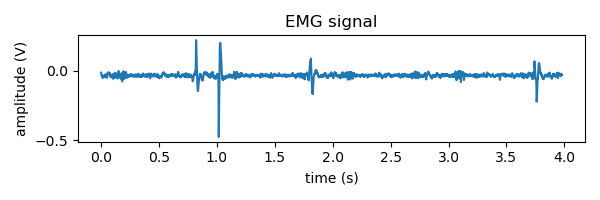

In [81]:
plot_1_channel_emg(emg)

In [82]:
idx,outlier,b = deleteoutliers(emg.values,alpha=0.05,rep=1,fact=1)

3980 4.373101200541002
3979 4.373047487286385
3978 4.372993760153812
3977 4.372940019130011
3976 4.372886264213346
3975 4.372832495390582
3974 4.372778712660112
3973 4.3727249160164705
3972 4.372671105442606
3971 4.372617280940825
3970 4.372563442501842
3969 4.372509590120256
3968 4.37245572378295
3967 4.372401843488422
3966 4.372347949227451
3965 4.372294040990835
3964 4.372240118773253
3963 4.372186182573258
3962 4.372132232373974
3961 4.372078268173986
3960 4.372024289964175
3959 4.371970297739293
3958 4.371916291494109
3957 4.3718622712118425
3956 4.371808236898858
3955 4.371754188538408
3954 4.3717001261253285
3953 4.371646049650613
3952 4.371591959112975
3951 4.371537854503444
3950 4.371483735809215
3949 4.371429603029046
3948 4.371375456154017
3946 4.371267120091457
3945 4.371212930886168
3944 4.371158727558185
3943 4.37110451009867
3942 4.371050278502641
3941 4.370996032761291
3940 4.370941772865831
3939 4.370887498811331
3938 4.370833210585194
3937 4.370778908190194
3936 4.370

In [83]:
b

array([-0.01266479, -0.01480103, -0.02243042, ..., -0.02944946,
       -0.02883911, -0.02883911])

In [84]:
outlier

array([ 0.07766819,  0.18509197,  0.22262955,  0.22140884,  0.18692303,
        0.15121651,  0.12191963,  0.08407688,  0.04165745, -0.07858372,
       -0.09659004, -0.11581612, -0.12802315, -0.13626289, -0.14206123,
       -0.14480782, -0.14602852, -0.1374836 , -0.13229561, -0.12466621,
       -0.11612129, -0.09994698, -0.08773899, -0.16159344, -0.41702938,
       -0.47745514, -0.40360069, -0.33585072, -0.23300552, -0.14969063,
        0.07553196,  0.11947823,  0.15518379,  0.17868328,  0.19119549,
        0.19851971,  0.2037077 ,  0.20035076,  0.18570232,  0.17319012,
        0.16098309,  0.14816475,  0.12832832,  0.1109333 ,  0.09109592,
        0.0724802 ,  0.04928684,  0.03494358,  0.0151062 ,  0.01480103,
        0.02700806,  0.04592991,  0.05172825,  0.05722141,  0.06454563,
        0.06607151,  0.05966282,  0.06546116,  0.06820774,  0.07888889,
        0.08895969,  0.07217503,  0.04531956,  0.01968384, -0.0996418 ,
       -0.13504219, -0.15121651, -0.15793133, -0.15640545, -0.15

In [85]:
idx

array([False, False, False, ..., False, False, False])

In [86]:
len(b), len(emg)-len(b)

(3872, 108)

In [88]:
emg_2 = emg.copy(deep = True)
emg_2[idx] = np.mean(emg)

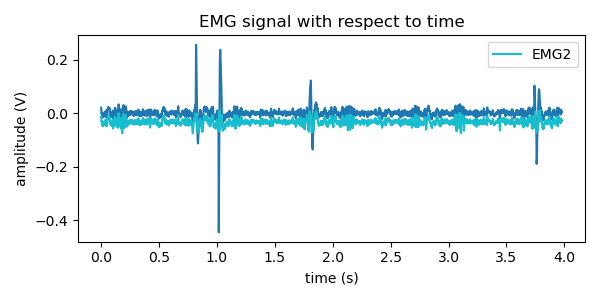

In [89]:
plot_2_channel_emg(mean_removal(emg),emg_2,al=1)

## TIME DOMAIN

In [ ]:
# time normalisation: one plot with every length one plot normalise
# envelope: hilbert, rms (2 factors), low pass(2 freq), average (2 windows)

In [209]:
BMu_nb = 29

#one subject test
subject = 2
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
BMu_dict['BMu'+str(BMu_nb)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[1]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0]}

In [211]:
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs

(<function functions.Biomarker_function.BMu29(emg, event, sub_MVIC, sub_MVIC_event, show=False, **kwargs)>,
 <function functions.Biomarker_function.preprocessing_du_2018(emg)>,
 ['L_MTF', 'R_MTF'],
 'Trunk_Forward',
 False,
 '',
 False,
 True,
 '',
 {'nb_BM': 29, 'muscle': 'L_MTF'})

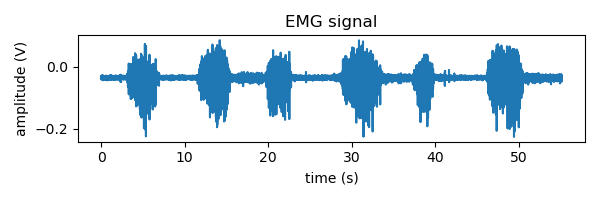

In [210]:
plot_1_channel_emg(emg)

In [231]:
emg = full_wave(mean_removal(emg))
lpf_1 = butterfilter_dual(emg,order = 2, c_f=4)
lpf_2 = butterfilter_dual(emg,order = 2, c_f=20)
rec_rms_1 = rolling_function(emg,win=50,func=rms,unit = 'frame')
rec_rms_2 = rolling_function(emg,win=200,func = rms, unit= 'frame')
avrg1 = rolling_function(emg,win = 50, func = np.nanmean, unit='frame')
avrg2 = rolling_function(emg,win = 200, func = np.nanmean, unit='frame')


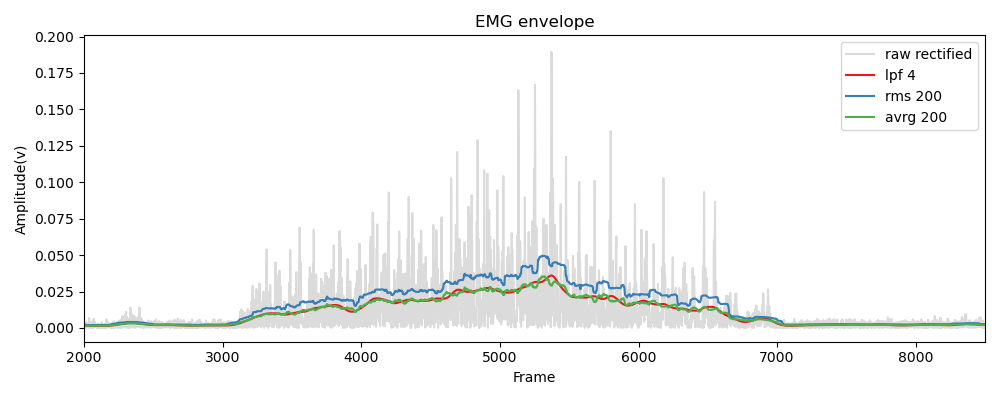

In [259]:
color_list = [sns.color_palette("gist_yarg")[0]] + sns.color_palette("Set1")
fig, ax = plt.subplots(figsize = (10,4))
i=0
for s,l in list(zip([emg,lpf_1,rec_rms_2,avrg2],['raw rectified','lpf 4','rms 200','avrg 200'])):
    ax.plot(s,label=l, linewidth = 1.5 if l == 'raw' else 1.5,color=color_list[i])
    i+=1

ax.legend()
ax.set_xlim(2000,8500)
ax.set(title='EMG envelope', ylabel = 'Amplitude(v)',xlabel='Frame')
fig.tight_layout()

## FREQUENCY

In [95]:
BMu_nb = 29

#one subject test
subject = 14
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
BMu_dict['BMu'+str(BMu_nb)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[1]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0]}

In [96]:
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs

(<function functions.Biomarker_function.BMu29(emg, event, sub_MVIC, sub_MVIC_event, show=False, **kwargs)>,
 <function functions.Biomarker_function.preprocessing_du_2018(emg)>,
 ['L_MTF', 'R_MTF'],
 'Trunk_Forward',
 False,
 '',
 False,
 True,
 '',
 {'nb_BM': 29, 'muscle': 'L_MTF'})

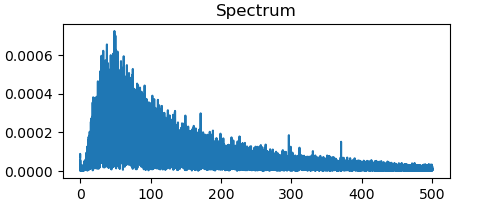

In [97]:
freq,amp = fft_function(emg,freq_0=False,show=True)

In [98]:
median = {}

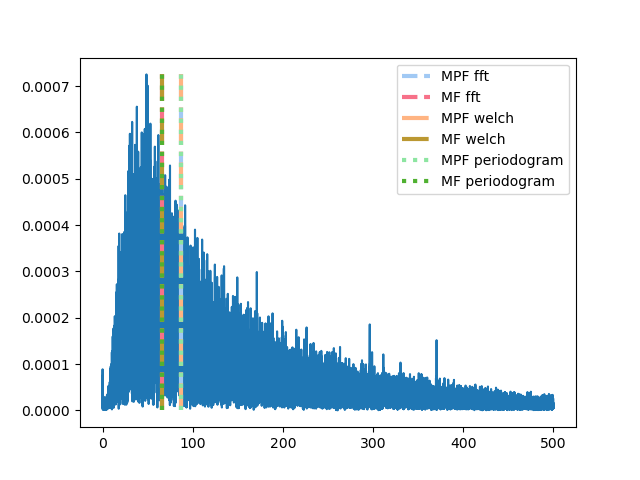

In [26]:
fig,ax = plt.subplots()
ax.plot(freq,amp)
i =0
mpf,median = {},{}

line_s = ['--','-.',':']
color_list = sns.color_palette("pastel", 6).as_hex()
color_list1 = sns.color_palette("husl", 6).as_hex()

for type_m in ['fft','welch','periodogram']:
    mpf[type_m] = mean_power_frequency(emg,type=type_m)
    ax.vlines(mpf[type_m],colors=color_list[i],linestyle=line_s[i],linewidth=3,ymin = 0,ymax=np.max(amp),label=f'MPF {type_m}')

    median[type_m] = median_frequency(emg,type=type_m)
    ax.vlines(median[type_m],colors=color_list1[i],linestyle=line_s[i],linewidth=3,ymin = 0,ymax=np.max(amp),label=f'MF {type_m}')

    i+= 1
ax.legend()

In [46]:
win = 1
emg_mpf_roll = emg_rolling = emg.rolling(win*SAMPLING_RATE, min_periods = 1,center = True,closed = 'both',step = (win*SAMPLING_RATE)//2).apply(mean_power_frequency)
emg_mf_roll = emg_rolling = emg.rolling(win*SAMPLING_RATE, min_periods = 1,center = True,closed = 'both',step = (win*SAMPLING_RATE)//2).apply(median_frequency)

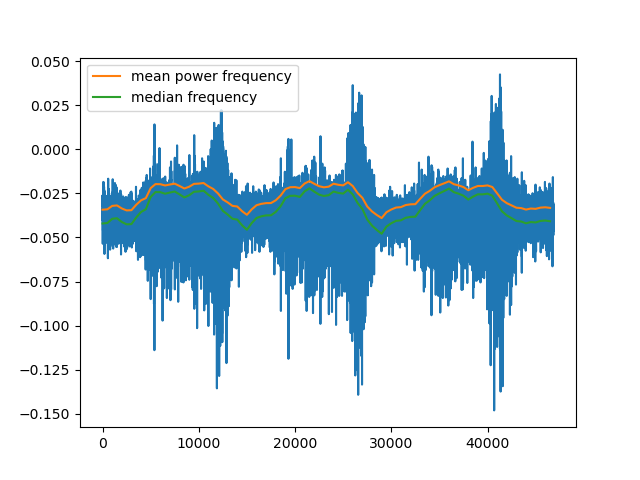

In [48]:
fig,ax = plt.subplots()
ax.plot(emg)
ax.plot(list(emg_mpf_roll.index),emg_mpf_roll*np.mean(emg)/np.max(emg_mpf_roll),label='mean power frequency')
ax.plot(list(emg_mpf_roll.index),emg_mpf_roll*np.mean(emg)/np.max(emg_mf_roll),label='median frequency')
ax.legend()

## EVENT

### Time Normalization Gait

In [161]:
BMu_nb = 102

#one subject test
subject = 9
session = 'INI'
trial = 1

# BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = [BMu1,preprocessing_ahern_1988,['L_LES','R_LES'],'Weight_Unconstrained',False,'',False,True,'',{}]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict[f'BMu{str(BMu_nb)}']
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs
emg_ = load_file_subject_mvt_session2(subject,task,session,n=1)[muscles[0]]
event_ = load_event_subject_mvt_session2(subject,task,session,n=1)
kwargs = {}
filtered_emg = preprocessing_arendt_nielsen_1995(emg)

In [162]:
event_
emg = emg_.copy(deep=True)

In [163]:
event_.sort_values(by=['time_sec'])

event  time_sec  time_min
0    RHS      0.14       0.0
12   LTO      0.28       0.0
8    LHS      0.73       0.0
4    RTO      0.89       0.0
1    RHS      1.31       0.0
13   LTO      1.46       0.0
9    LHS      1.89       0.0
5    RTO      2.05       0.0
2    RHS      2.45       0.0
14   LTO      2.63       0.0
10   LHS      3.08       0.0
6    RTO      3.26       0.0
3    RHS      3.67       0.0
15   LTO      3.84       0.0
11   LHS      4.26       0.0
7    RTO      4.45       0.0

In [164]:
event = event_.copy(deep = True)

# conversion from time in sec and min to frame
event['frame'] = event.apply(lambda x: int(np.around((60 * x['time_min'] + x['time_sec'])*SAMPLING_RATE, decimals=0)),axis=1)
event = event.sort_values(by='frame').iloc[:-1,:] #the last event represent a subphase that is not complete #CHANGED

# creation of a Dataframe with the emg values per frame and merged on 'frame' with the event DataFrame
emg_df = pd.DataFrame({'frame':np.arange(len(emg)) +1, 'emg':emg})

df = pd.merge(emg_df, event[['frame','event']], on='frame', how='left')
event,df.loc[100:115,:]

(   event  time_sec  time_min  frame
 0    RHS      0.14       0.0    140
 12   LTO      0.28       0.0    280
 8    LHS      0.73       0.0    730
 4    RTO      0.89       0.0    890
 1    RHS      1.31       0.0   1310
 13   LTO      1.46       0.0   1460
 9    LHS      1.89       0.0   1890
 5    RTO      2.05       0.0   2050
 2    RHS      2.45       0.0   2450
 14   LTO      2.63       0.0   2630
 10   LHS      3.08       0.0   3080
 6    RTO      3.26       0.0   3260
 3    RHS      3.67       0.0   3670
 15   LTO      3.84       0.0   3840
 11   LHS      4.26       0.0   4260,
      frame       emg event
 100    101 -0.038606   NaN
 101    102 -0.037385   NaN
 102    103 -0.039521   NaN
 103    104 -0.038606   NaN
 104    105 -0.037690   NaN
 105    106 -0.034333   NaN
 106    107 -0.037080   NaN
 107    108 -0.034944   NaN
 108    109 -0.035554   NaN
 109    110 -0.036775   NaN
 110    111 -0.035859   NaN
 111    112 -0.037690   NaN
 112    113 -0.037995   NaN
 113    114 -0.

In [165]:
# creation of an Itorator to give a number from one to n each time the first event of the Dataframe is encoutered (ie for each gait cycle)
iter_ = iter(np.arange(event.shape[0]))
next(iter_)
df['stride'] = df['event'].apply(lambda x: next(iter_) if x == df['event'].loc[~df['event'].isnull()].iloc[0] else None)

In [166]:
df.loc[100:115,:]

frame       emg event  stride
100    101 -0.038606   NaN     NaN
101    102 -0.037385   NaN     NaN
102    103 -0.039521   NaN     NaN
103    104 -0.038606   NaN     NaN
104    105 -0.037690   NaN     NaN
105    106 -0.034333   NaN     NaN
106    107 -0.037080   NaN     NaN
107    108 -0.034944   NaN     NaN
108    109 -0.035554   NaN     NaN
109    110 -0.036775   NaN     NaN
110    111 -0.035859   NaN     NaN
111    112 -0.037690   NaN     NaN
112    113 -0.037995   NaN     NaN
113    114 -0.036775   NaN     NaN
114    115 -0.034028   NaN     NaN
115    116 -0.037080   NaN     NaN

In [167]:
df['stride'].unique()

array([nan,  1.,  2.,  3.,  4.])

In [168]:
# filling of the empty values of the 'stride' column with the previous values so that each sample belonging to a stride has its corresponding number
df['stride'] = df['stride'].fillna(method="ffill")

# division of the Dataframe per stride
df_stride_grouped = df.groupby('stride')
df_stride_grouped.get_group(3)['event'].value_counts(),df_stride_grouped.get_group(2)['event'].value_counts()  # the last cycle is not complete



(RHS    1
 LTO    1
 LHS    1
 RTO    1
 Name: event, dtype: int64,
 RHS    1
 LTO    1
 LHS    1
 RTO    1
 Name: event, dtype: int64)

In [169]:
len(df_stride_grouped.get_group(3)['event'].value_counts())

4

In [170]:
def time_nomalization(emg):
    if empty_value_check(emg):
        emg[np.isnan(emg)] = np.mean(emg)
    n = len(emg)  
    x = np.arange(n)
    x_new = np.linspace(0,n,500)
    cs = interpolate.CubicSpline(x,emg)
    return cs(x_new)

In [171]:
df_emg_event_norm = pd.DataFrame(data=None, columns=['emg','frame','event','stride'])

## For each stride
for k in range(1,len(df_stride_grouped)+1):
    if len(df_stride_grouped.get_group(k)['event'].value_counts()) == 4 :
            
        ## time normalization emg
        # retrieves one stride
        df_stride = df_stride_grouped.get_group(k) 
        # resampling so that one stride = 500 samples, one stride = 100%
        emg_norm = time_nomalization(df_stride['emg'].values) 
        # replace frame by percent for index
        percent = np.linspace(0,100,len(emg_norm)) 
        df_emg_norm = pd.DataFrame({'emg': emg_norm, 'frame':percent })

        ## time normalized event
        # get the event of the stride
        df_stride_na = df_stride.dropna() 
        # conversion of the frame of the event from frame to percent (%  for 500 samples) and so that it begins with 0
        # df_stride['frame'].iloc[0] is the number of the frame where the stride start
        # x is positionned at the index (x - df_stride['frame'].iloc[0]) of the stride
        event_norm = df_stride_na['frame'].apply(lambda x:  percent[int((x - df_stride['frame'].iloc[0])*500/len(df_stride['emg']))])

        # event_norm = df_stride_na['frame'].apply(lambda x:  (x - df_stride['frame'].iloc[0]) * 500/len(df_stride['emg'] ))
        event_norm = list(event_norm.values)

        df_event_norm = pd.DataFrame( {'frame':event_norm, 'event':df_stride_na['event']}) 
    #    frame(%) event
    # 109      0   RHS
    # 239     57   LTO
    # 669    247   LHS
    # 799    305   RTO
        
        ## Merging of the time normalized event and emg
        df_emg_event_norm_k = pd.merge(df_emg_norm, df_event_norm , on='frame', how='left')
        df_emg_event_norm_k['stride'] = np.ones( df_emg_event_norm_k.shape[0])*k
        
        df_emg_event_norm = pd.concat([df_emg_event_norm, df_emg_event_norm_k],ignore_index=True)

In [172]:
df_emg_event_norm


emg       frame event  stride
0    -0.025787    0.000000   RHS     1.0
1    -0.033020    0.200401   NaN     1.0
2    -0.042641    0.400802   NaN     1.0
3    -0.050820    0.601202   NaN     1.0
4    -0.043839    0.801603   NaN     1.0
...        ...         ...   ...     ...
1495 -0.039873   99.198397   NaN     3.0
1496 -0.035737   99.398798   NaN     3.0
1497 -0.035604   99.599198   NaN     3.0
1498 -0.034141   99.799599   NaN     3.0
1499 -0.053390  100.000000   NaN     3.0

[1500 rows x 4 columns]

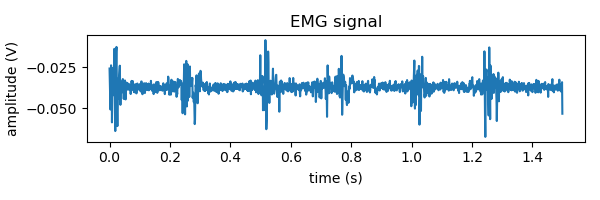

In [173]:
plot_1_channel_emg(df_emg_event_norm['emg']) #two stride of 500 points

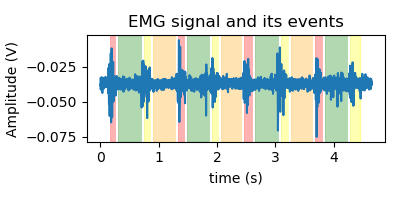

In [174]:
event_line = extract_event(emg,event_,event_type='Gait',show=True)

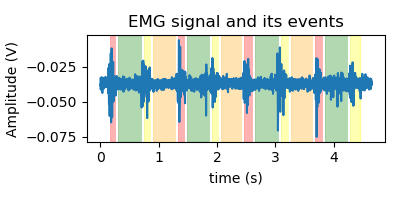

In [175]:
event_line_emg = extract_event(emg_,event_,event_type='Gait',show=True)

In [176]:
event_seg = event_gait_segmentation(emg_, event_line)

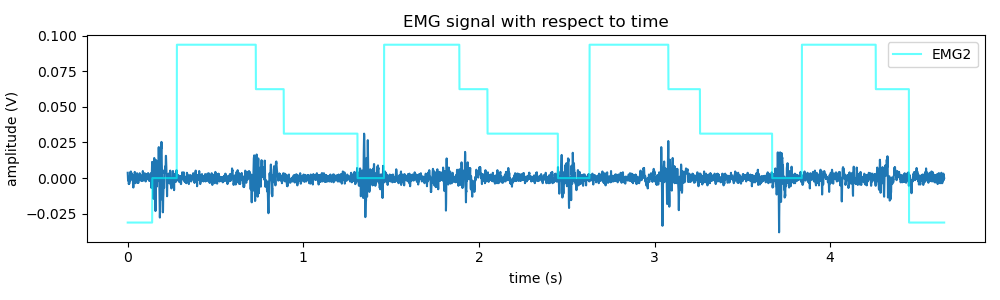

In [177]:
plot_2_channel_emg(mean_removal(emg_),event_line*np.max(mean_removal(emg_)),figs=(10,3))

In [178]:
np.concatenate(event_seg.loc[event_seg['rep']==i,'emg'].values)

array([-0.02944946, -0.03372288, -0.03769016, ..., -0.03311253,
       -0.03555393, -0.03646946])

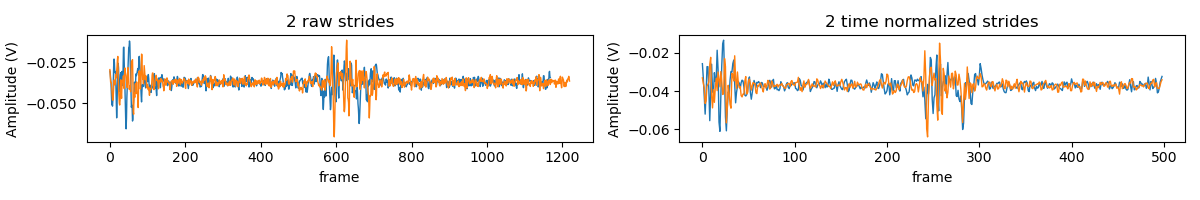

In [271]:
fig,ax = plt.subplots(1,2,figsize = (12,2))
for i in range(1,np.max(event_seg['rep'].unique())+1):
    if i != 2:
        ax[0].plot(butterfilter_dual(np.concatenate(event_seg.loc[event_seg['rep']==i,'emg'].values),order=2,c_f=400),linewidth=1)

for i in range(1,int(np.max(df_emg_event_norm['stride'].unique())+1)):
        if i != 2:

            ax[1].plot(butterfilter_dual( df_emg_event_norm.loc[df_emg_event_norm['stride']==i,'emg'].values[:-1],order=2,c_f=400),linewidth=1)

for id,i in enumerate(['2 raw strides','2 time normalized strides']):
    ax[id].set(title = i, xlabel = 'frame', ylabel = 'Amplitude (V)')
fig.tight_layout()

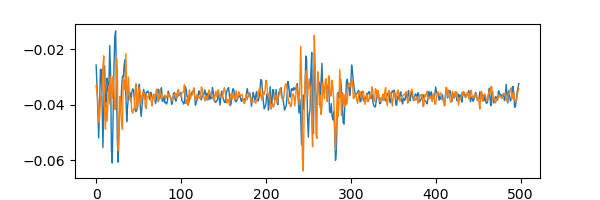

In [265]:
fig,ax = plt.subplots(figsize = (6,2))
for i in range(1,int(np.max(df_emg_event_norm['stride'].unique())+1)):
        if i != 2:

            ax.plot(butterfilter_dual( df_emg_event_norm.loc[df_emg_event_norm['stride']==i,'emg'].values[:-1],order=2,c_f=400),linewidth=1)

4.0

### Event gait segmentation


In [70]:
BMu_nb = 110

#one subject test
subject = 5
session = 'INI'
trial = 1

# BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = [BMu1,preprocessing_ahern_1988,['L_LES','R_LES'],'Weight_Unconstrained',False,'',False,True,'',{}]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
print(BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs)

emg = load_file_subject_mvt_session2(subject,task,session,n=1)['L_LES']
# event = load_event_subject_mvt_session2(subject,task,session,n=1)
kwargs = {}
# filtered_emg = butterfilter_dual( full_wave( mean_removal(  butterfilter_dual(emg, 4, 30, type ='highpass'))) , 4, 2.5, type = 'lowpass')


if event_computation: event = load_event_subject_mvt_session2(subject,task,session,n=trial)
else: event = None

if mvc_computation:
    sub_MVIC = load_file_subject_mvt_session2(subject,mvc_task,session,n=trial)[muscles[0]]

    try:
        sub_MVIC_event = load_event_subject_mvt_session2(subject,mvc_task,session,n=trial)
    except Exception as e:
        print(e)
        sub_MVIC_event = pd.DataFrame(data=None,columns=['event','time_sec','time_min'])


else : sub_MVIC,sub_MVIC_event = None,None

# MVC computation: event extraction, preprocessing, mean
event_line_mvc = extract_event(sub_MVIC,sub_MVIC_event,event_type = 'MVC')
filtered_sub_MVIC = preprocessing_pakdaz_2016(sub_MVIC[event_line_mvc == 1])
filtered_sub_MVIC_mean = np.mean(filtered_sub_MVIC)

# Preprocessing of the signal
filtered_emg = preprocessing_pakdaz_2016(emg)

# Event detection emg
event_line_emg= extract_event(filtered_emg,event,event_type='Gait')


<function BMu110 at 0x0000028F05D7B5B0> <function preprocessing_pakdaz_2016 at 0x0000028F05D7B400> ['L_RA', 'R_RA'] Gait_Normal True Endurance_Ito False True Gait {}


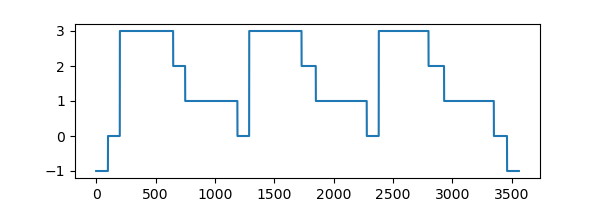

In [71]:
fig,ax = plt.subplots(figsize=(6,2))
ax.plot(event_line_emg)

array([-1., -1., -1., ..., -1., -1., -1.])

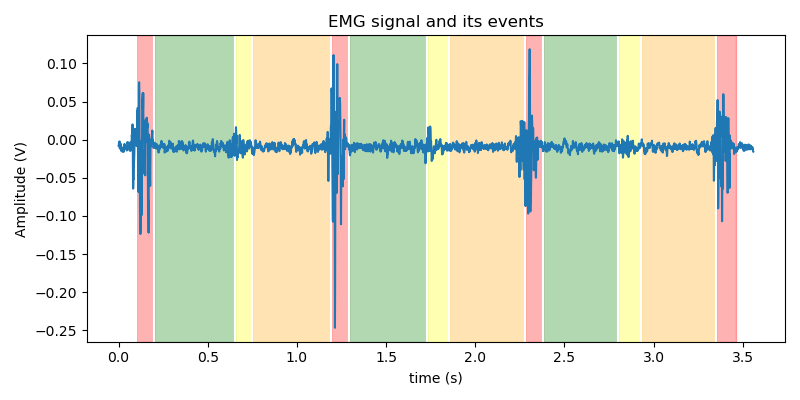

In [72]:
extract_event(emg,event,event_type='Gait',show=True,figs=(8,4))

In [54]:
event.sort_values('time_sec')

event  time_sec  time_min
6    LHS      0.10       0.0
3    RTO      0.19       0.0
0    RHS      0.61       0.0
9    LTO      0.69       0.0
7    LHS      1.12       0.0
4    RTO      1.21       0.0
1    RHS      1.65       0.0
10   LTO      1.74       0.0
8    LHS      2.17       0.0
5    RTO      2.24       0.0
2    RHS      2.67       0.0
11   LTO      2.77       0.0

In [55]:
event_key = []
emg_subphase = []
event_rep = []
rep_cycle = { 'RHS':0, 'RTO':0, 'LHS':0,'LTO':0}
last_index = 0

k_ini = None

dict_output = {'emg':[],'event':[],'rep':[]}

def check_eq(rep_cycle):
    for val in rep_cycle.values():
        if val != list(rep_cycle.values())[0]:
            return False
    return True

for k,g in groupby(event_line_emg):

    if k != -1:
        if k_ini == None:
            k_ini = k
        
        len_seg = len(list(g))
        rep_cycle[EVENT_GAIT[k]] += 1
        event_rep += [rep_cycle[EVENT_GAIT[k]]]
        event_key.append(EVENT_GAIT[k])
        emg_subphase += [filtered_emg[last_index: last_index + len_seg]]
        last_index += len_seg

        if check_eq(rep_cycle):
            # add to the dict that will turn into the output dataframe¨
            dict_output['emg'] += emg_subphase
            dict_output['event'] += event_key
            dict_output['rep'] += event_rep
            event_key = []
            emg_subphase = []
            event_rep = []


# df_emg = [[a,b,c] for a,b,c in zip(emg_subphase,event_key,event_rep)]
# df_emg = pd.DataFrame(df_emg,columns=['emg','event','rep'])

df_emg = pd.DataFrame(dict_output)


In [56]:
df_emg

emg event  rep
0  [-4.771499179403012e-05, -1.3694286142980815e-...   LHS    1
1  [0.001958880819199703, 0.001978488052936128, 0...   RTO    1
2  [0.0018798955678189268, 0.001879073992119604, ...   RHS    1
3  [0.0018307802028009804, 0.0018313506182241492,...   LTO    1
4  [0.004021783008138593, 0.004018504188867052, 0...   LHS    2
5  [0.0026785593243655727, 0.002666155471213021, ...   RTO    2
6  [0.001842205270409232, 0.0018409593011128188, ...   RHS    2
7  [0.0019750664062531446, 0.0019800491275903777,...   LTO    2

In [57]:
df_emg_ini = event_gait_segmentation(filtered_emg, event_line_emg)

In [58]:
df_emg_ini.shape[0]/4

2.0

### Event 2 segmentation

In [80]:
BMu_nb = 36

#one subject test
subject = 1
session = 'INI'
trial = 1

# BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = [BMu1,preprocessing_ahern_1988,['L_LES','R_LES'],'Weight_Unconstrained',False,'',False,True,'',{}]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
print(BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs)

emg = load_file_subject_mvt_session2(subject,task,session,n=1)[muscles[0]]
# event = load_event_subject_mvt_session2(subject,task,session,n=1)
kwargs = {}
# filtered_emg = butterfilter_dual( full_wave( mean_removal(  butterfilter_dual(emg, 4, 30, type ='highpass'))) , 4, 2.5, type = 'lowpass')


if event_computation: event = load_event_subject_mvt_session2(subject,task,session,n=trial)
else: event = None

if mvc_computation:
    sub_MVIC = load_file_subject_mvt_session2(subject,mvc_task,session,n=trial)[muscles[0]]

    try:
        sub_MVIC_event = load_event_subject_mvt_session2(subject,mvc_task,session,n=trial)
    except Exception as e:
        print(e)
        sub_MVIC_event = pd.DataFrame(data=None,columns=['event','time_sec','time_min'])


else : sub_MVIC,sub_MVIC_event = None,None



<function BMu36 at 0x0000028F05D90DC0> <function preprocessing_dankaerts_2009 at 0x0000028F05D90C10> ['L_MTF', 'R_MTF'] Trunk_Forward True Endurance_Sorensen False True  {}


In [81]:
def event_2_segmentation(filtered_emg,event,show = False,separation = 'sub'):
    """FROM THE OUTPUT OF EXTRACT EVENT: segments the signal in subphases 
    (Used for Lima, Larivier, Courbalay, Du, Ahern , Neblett)
    (From the EDA of events : no tasks where cut in half, there is always a 'return' with a 'bending' WHEN the last event is removed (this is included in the computation of event line)

    Args:
        filtered_emg (_type_): _description_
        event (_type_): " event time line" of the function extract_event
        show (bool, optional): _description_. Defaults to False.

    Returns:
        dataframe: (columns: emg, event, repetition ) each row comprises the emg segment of the corresponding subphase
    """
    

    event_key = []
    emg_subphase = []
    event_rep = []
    rep_cycle = { 'bending':0, 'return':0 }
    last_index = 0

    for k,g in groupby(event):
        if k != -1:
            len_seg = len(list(g))

            rep_cycle[EVENT_BEND[k]] += 1
            event_rep += [rep_cycle[EVENT_BEND[k]]]
            event_key.append(EVENT_BEND[k])
            emg_subphase += [filtered_emg[last_index: last_index + len_seg]]
            last_index += len_seg

    df_emg = [[a,b,c] for a,b,c in zip(emg_subphase,event_key,event_rep)]
    df_emg = pd.DataFrame(df_emg,columns=['emg','event','rep'])

   
    return df_emg

In [82]:
event.sort_values('time_sec')

event   time_sec  time_min
0  startMotion   0.100000       0.0
4   stopMotion   9.820000       0.0
1  startMotion  18.889999       0.0
5   stopMotion  28.410000       0.0
2  startMotion  36.939999       0.0
6   stopMotion  44.950001       0.0
3  startMotion  53.209999       0.0

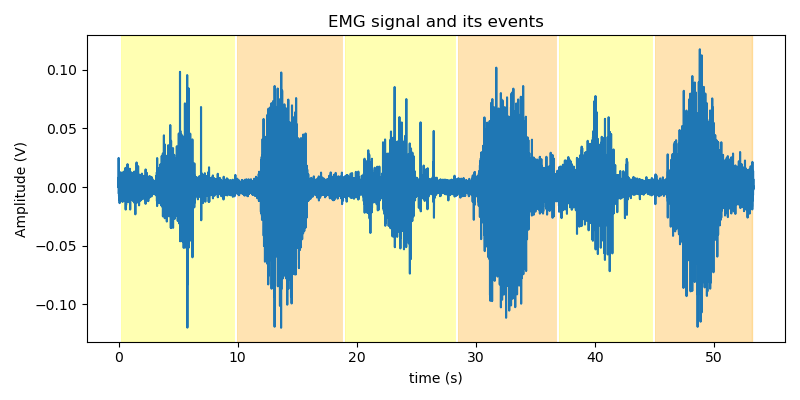

In [87]:
 # Preprocessing of the signal
filtered_emg = preprocessing_du_2018(emg)

# Event detection
event_line_emg = extract_event(filtered_emg,event,event_type = '',show=True,figs=(8,4) )
# Normalization to the maximum value
emg_norm = normalization_peak(filtered_emg)

# Segmentation of the signal according to event
df_emg_subphase = event_2_segmentation(emg_norm, event_line_emg)


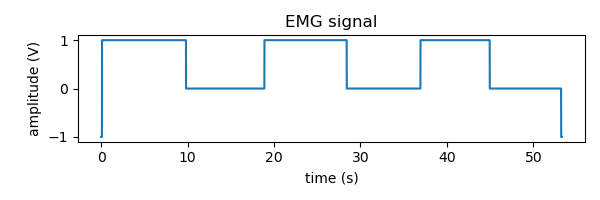

In [84]:
plot_1_channel_emg(event_line_emg)

In [41]:
df_emg_subphase

emg    event  rep
0  [0.16162086874238296, 18.805437530566387, 21.1...  bending    1
1  [-2.660664536043713, -0.30914921295468945, 1.2...   return    1
2  [-3.099776659810633, -6.392463741734806, -5.99...  bending    2
3  [1.9607471502815543, 1.2009030128838751, -1.11...   return    2
4  [-1.7534970332946949, 3.662122992172448, -4.04...  bending    3
5  [-1.9185675724595068, -1.9712055520696028, -2....   return    3

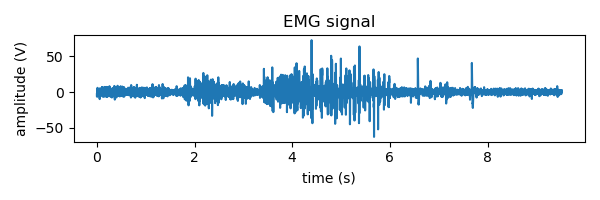

In [42]:
plot_1_channel_emg(df_emg_subphase.loc[2,'emg'])

### Event inbetween subphases

In [4]:
BMu_nb = 36
desc = ''
#one subject test
subject = 1
session = 'INI'
trial = 1

# BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = [BMu1,preprocessing_ahern_1988,['L_LES','R_LES'],'Weight_Unconstrained',False,'',False,True,'',{}]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)+ desc]
print(BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs)

emg = load_file_subject_mvt_session2(subject,task,session,n=1)[muscles[0]]
# event = load_event_subject_mvt_session2(subject,task,session,n=1)
kwargs = {}
# filtered_emg = butterfilter_dual( full_wave( mean_removal(  butterfilter_dual(emg, 4, 30, type ='highpass'))) , 4, 2.5, type = 'lowpass')


if event_computation: event_ = load_event_subject_mvt_session2(subject,task,session,n=trial)
else: event = None

if mvc_computation:
    sub_MVIC = load_file_subject_mvt_session2(subject,mvc_task,session,n=trial)[muscles[0]]

    try:
        sub_MVIC_event = load_event_subject_mvt_session2(subject,mvc_task,session,n=trial)
    except Exception as e:
        print(e)
        sub_MVIC_event = pd.DataFrame(data=None,columns=['event','time_sec','time_min'])


else : sub_MVIC,sub_MVIC_event = None,None



<function BMu36 at 0x0000028F05D90DC0> <function preprocessing_dankaerts_2009 at 0x0000028F05D90C10> ['L_MTF', 'R_MTF'] Trunk_Forward True Endurance_Sorensen False True  {}


In [5]:
event = event_.copy(deep=True)

In [6]:
filtered_emg = preprocessing(emg)
#event detection
event_inbtw_phase = event_segmentation_inbtw_subpart(filtered_emg,event,win = 1.5)

In [7]:
event.sort_values('time_sec')

event   time_sec  time_min
0  startMotion   0.100000       0.0
4   stopMotion   9.820000       0.0
1  startMotion  18.889999       0.0
5   stopMotion  28.410000       0.0
2  startMotion  36.939999       0.0
6   stopMotion  44.950001       0.0
3  startMotion  53.209999       0.0

In [8]:
if len(event.loc[event['event']=='startMotion'] ) > len(event.loc[event['event']=='stopMotion'] ): 
    print('more start')
    event = event.sort_values('time_sec').iloc[:-1,:] # removal of the last event because it is not part of a new trial
# the first trial is kept as a full trial eventhought it is cropped
# the standing period at the beginning of the signal has been used as the reference for the standing/bending trial 
# (it could have been half of the time at the beginning, before bending, and half of the time at the end, after the flexion)


more start


In [9]:
event

event   time_sec  time_min
0  startMotion   0.100000       0.0
4   stopMotion   9.820000       0.0
1  startMotion  18.889999       0.0
5   stopMotion  28.410000       0.0
2  startMotion  36.939999       0.0
6   stopMotion  44.950001       0.0

array([-1., -1., -1., ..., -1., -1., -1.])

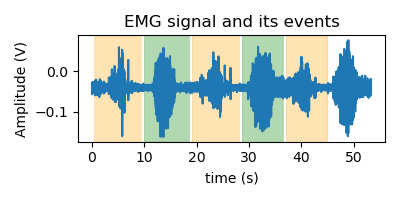

In [10]:
extract_event(emg,event,event_type='',show=True)

In [11]:
win = 1.5
event_key = [] # store for each event its name
emg_subphase = [] # store for each event its corresponding signal
event_rep = [] # store for each event the number of time it has been performed
rep_cycle = { 'startMotion':0, 'stopMotion':0 } # will save the number of standing and mvf tasks that were performed

for i,row in event.iterrows(): 
    
    current_event = row['event']
    rep_cycle[current_event] += 1   
    ti = row['time_sec'] + row['time_min']*60 # time of the event in sec

    event_rep += [rep_cycle[current_event]]
    event_key.append('stand' if current_event == 'startMotion' else 'flexion')
    subpart = emg[np.max([0,int((ti - win)*SAMPLING_RATE)]): np.min([len(emg),int((ti + win)*SAMPLING_RATE)])] # extract the signal from a 3sec window center around the event
    emg_subphase += [subpart]



In [51]:
event_key

['stand', 'flexion', 'stand', 'flexion', 'stand', 'flexion']

In [52]:
df_emg = [[a,b,c] for a,b,c in zip(emg_subphase,event_key,event_rep)]
df_emg = pd.DataFrame(df_emg,columns=['emg','event','rep'])



In [53]:
df_emg

emg    event  rep
0  0      -0.056306
1      -0.033723
2      -0.03...    stand    1
1  8319    -0.033723
8320    -0.032197
8321    -0...  flexion    1
2  17389   -0.039521
17390   -0.038911
17391   -0...    stand    2
3  26909   -0.037080
26910   -0.036164
26911   -0...  flexion    2
4  35439   -0.041352
35440   -0.040742
35441   -0...    stand    3
5  43450   -0.041657
43451   -0.039826
43452   -0...  flexion    3

array([-1., -1., -1., ..., -1., -1., -1.])

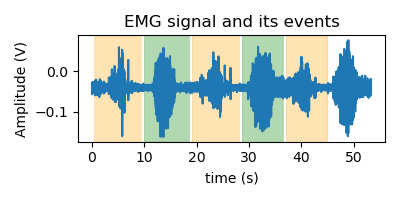

In [54]:
extract_event(emg,event,event_type='',show=True)

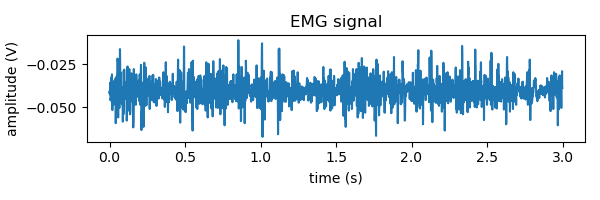

In [55]:
plot_1_channel_emg(df_emg.loc[4,'emg'])

### Event segmentation Flex return : event definition, plot and segmentation

In [88]:
BMu_nb = 42
desc = ''
#one subject test
subject = 3
session = 'INI'
trial = 1

# BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = [BMu1,preprocessing_ahern_1988,['L_LES','R_LES'],'Weight_Unconstrained',False,'',False,True,'',{}]
BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)+ desc]
print(BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs)

emg = load_file_subject_mvt_session2(subject,task,session,n=1)[muscles[0]]
# event = load_event_subject_mvt_session2(subject,task,session,n=1)
kwargs = {}
# filtered_emg = butterfilter_dual( full_wave( mean_removal(  butterfilter_dual(emg, 4, 30, type ='highpass'))) , 4, 2.5, type = 'lowpass')


if event_computation: event_ = load_event_subject_mvt_session2(subject,task,session,n=trial)
else: event = None

if mvc_computation:
    sub_MVIC = load_file_subject_mvt_session2(subject,mvc_task,session,n=trial)[muscles[0]]

    try:
        sub_MVIC_event = load_event_subject_mvt_session2(subject,mvc_task,session,n=trial)
    except Exception as e:
        print(e)
        sub_MVIC_event = pd.DataFrame(data=None,columns=['event','time_sec','time_min'])


else : sub_MVIC,sub_MVIC_event = None,None



<function BMu42 at 0x0000028F05D7A0E0> <function preprocessing_neblett_2014 at 0x0000028F05D79F30> ['L_LES', 'R_LES'] Trunk_Forward False  False True  {}


In [89]:
type(emg)

pandas.core.series.Series

In [90]:
event_.sort_values('time_sec')

event   time_sec  time_min
0  startMotion   0.100000       0.0
4   stopMotion   9.720000       0.0
1  startMotion  17.790001       0.0
5   stopMotion  25.900000       0.0
2  startMotion  34.340000       0.0
6   stopMotion  43.000000       0.0
3  startMotion  54.580002       0.0

In [91]:
win = 1.5
event = event_.copy(deep=True)
event['time'] = event.apply(lambda x: x['time_sec'] + x['time_min']*60,axis=1)
event = event.sort_values(by = ['time']).reset_index(drop=True) # all the event are kept so that the two last standing events can be computed

i=0
new_tstart,new_tstop = [],[]
output = []

# stop standing = beginning of flexion
# start flexion = beginning of full flexion
# stop flexion = beginning of return

for i,row in event.iterrows():
    t = row['time']
    new_tstart = [ np.max([ 0,(t-win)]), f"start_{'standing' if row['event'] == 'startMotion' else 'flexion'}" ] #[ time , event ]
    new_tstop = [ np.min([ len(emg)/SAMPLING_RATE,(t+win)]), f"stop_{'standing' if row['event'] == 'startMotion' else 'flexion'}" ] #[ time , event ]

    output += [new_tstart,new_tstop]

df_output = pd.DataFrame(output,columns=['time','event'])

In [92]:
event

event   time_sec  time_min       time
0  startMotion   0.100000       0.0   0.100000
1   stopMotion   9.720000       0.0   9.720000
2  startMotion  17.790001       0.0  17.790001
3   stopMotion  25.900000       0.0  25.900000
4  startMotion  34.340000       0.0  34.340000
5   stopMotion  43.000000       0.0  43.000000
6  startMotion  54.580002       0.0  54.580002

array([-1., -1., -1., ..., -1., -1., -1.])

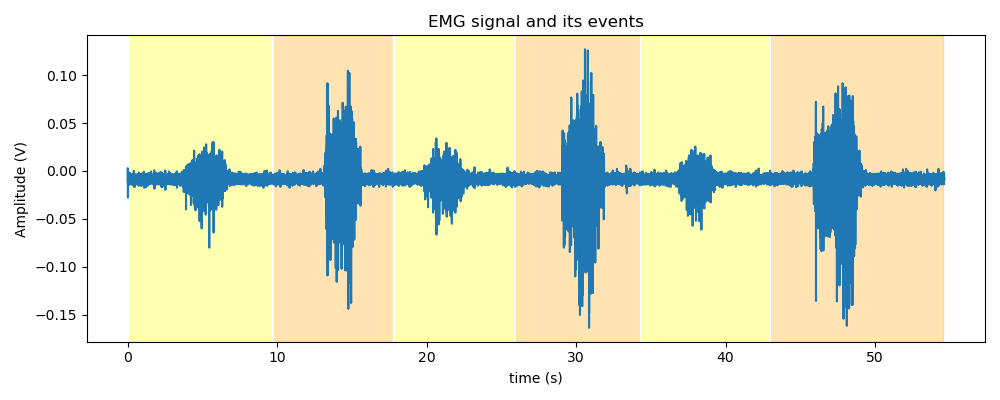

In [94]:
extract_event(emg,event_,event_type='',show=True,figs=(10,4))

In [49]:
df_output

time           event
0    0.000000  start_standing
1    1.600000   stop_standing
2    8.220000   start_flexion
3   11.220000    stop_flexion
4   16.290001  start_standing
5   19.290001   stop_standing
6   24.400000   start_flexion
7   27.400000    stop_flexion
8   32.840000  start_standing
9   35.840000   stop_standing
10  41.500000   start_flexion
11  44.500000    stop_flexion
12  53.080002  start_standing
13  54.632000   stop_standing

In [50]:
# Dankaerts segments the movement into quartile for flexion and return and extract the standing and full flexion periode.

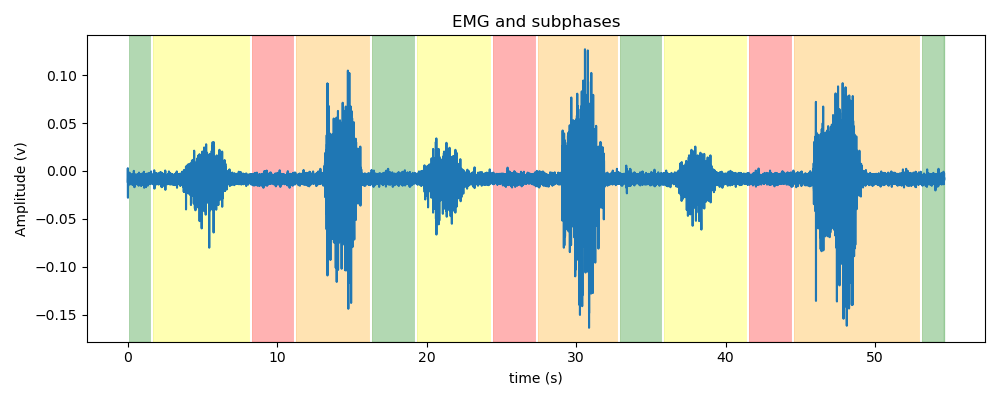

In [51]:
figs = (8,4)
xl='time (s)'
yl='Amplitude (v)'
plot_title='EMG and subphases' 
"""FROM THE OUTPUT OF  event_extraction_flex_return function: plot a representation of the segmentation 

Args:
    emg (_type_): _description_
    event (pd.DataFrame): _description_
    figs (tuple, optional): _description_. Defaults to (6,3).
    xl (str, optional): _description_. Defaults to 'time'.
    yl (str, optional): _description_. Defaults to 'Amplitude'.
    plot_title (str, optional): _description_. Defaults to 'Emg and subphases'.
"""
event = df_output

fig,ax = plt.subplots(figsize = figs)
event = event.sort_values(by = ['time']).reset_index(drop=True) 

for i in range(1,len(event['time'])):
    previous_t,current_t,previous_event = event['time'][i-1],event['time'][i],event['event'][i-1]
    p = plt.axvline(x=previous_t,color='white')
    ax.axvspan(previous_t, current_t, color='red' if previous_event == 'start_flexion' else 'orange' if previous_event == 'stop_flexion' else 'yellow' if previous_event == 'stop_standing' else 'green', alpha=0.3)

t = np.arange(0,len(emg))/SAMPLING_RATE
ax.set(xlabel=xl, ylabel=yl, title = plot_title)
ax.plot(t,emg)

fig.tight_layout()


In [78]:
# segmentation from the newly defined events

In [79]:
event_ = df_output

""" FROM THE OUTPUT of event_extraction_flex_return: segments the signal from the timestamps defined in the input event_
(USED for Dankaerts 2009)

Args:
    emg (np.ndarray): _description_
    event_ (pd.DataFrame): _description_

Returns:
    _type_: _description_
"""
if type(emg) != np.ndarray:
    emg = np.array(emg)
    print(type(emg))
    
event = event_.copy(deep=True)
event['time'] = event.apply(lambda x: int(x['time']*SAMPLING_RATE),axis=1)
emg_subphases = []
rep = 0
event_1 = event.loc[0,'event']
for i in range(event.shape[0]-1):
    if event_1 == event.loc[i,'event']:
        rep += 1

    new_row = [emg[event.loc[i,'time']:event.loc[i+1,'time']],event.loc[i,'event'],rep]
    emg_subphases += [new_row]

df_emg_subphases = pd.DataFrame(emg_subphases, columns=['emg','event','rep'])


<class 'numpy.ndarray'>


In [80]:
df_emg_subphases

emg           event  rep
0   [-0.006256103515625, -0.008087158203125, -0.00...  start_standing    1
1   [-0.009613037109375, -0.008392333984375, -0.00...   stop_standing    1
2   [-0.011749267578125, -0.008087158203125, -0.00...   start_flexion    1
3   [-0.006561279296875, -0.006866455078125, -0.00...    stop_flexion    1
4   [-0.000152587890625, -0.001678466796875, -0.00...  start_standing    2
5   [-0.009613037109375, -0.009307861328125, -0.00...   stop_standing    2
6   [-0.012664794921875, -0.008087158203125, -0.01...   start_flexion    2
7   [-0.007781982421875, -0.012664794921875, -0.00...    stop_flexion    2
8   [-0.011749267578125, -0.012054443359375, -0.00...  start_standing    3
9   [-0.012054443359375, -0.009918212890625, -0.00...   stop_standing    3
10  [-0.009307861328125, -0.007476806640625, -0.01...   start_flexion    3
11  [-0.007781982421875, -0.010223388671875, -0.00...    stop_flexion    3
12  [-0.010833740234375, -0.010833740234375, -0.00...  start_standing    4

In [81]:
df_emg_subphases['emg'][2]

array([-0.01174927, -0.00808716, -0.00778198, ..., -0.00900269,
       -0.00808716, -0.00961304])

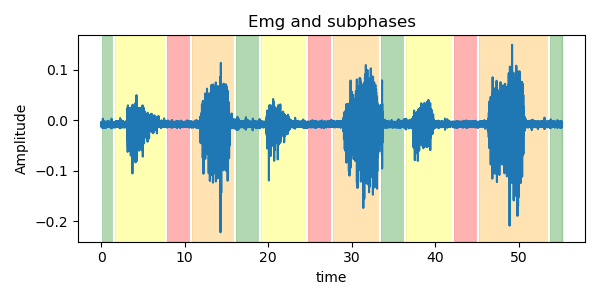

In [82]:
plot_event_extraction(emg, df_output)

c:\Users\Anais\Studio Code\Project 1\nslbp-bio_toolbox2\functions\plot_function.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = figs)


('start_flexion', None)

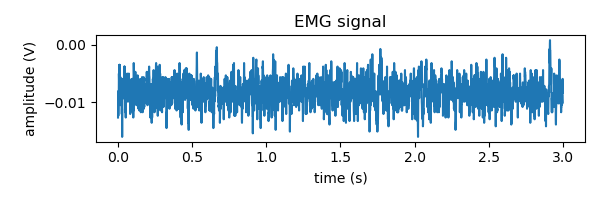

In [83]:
df_emg_subphases.loc[6,'event'],plot_1_channel_emg(df_emg_subphases.loc[6,'emg'])

In [ ]:

# extraction of the events start/stop_standing_flexion
df_extracted_event = event_extraction_flex_return(filtered_emg,event)
# segmentation of the emg according to the previously computed event
df_emg_subphases = event_segmentation_from_df_time(filtered_emg,df_extracted_event)


## BM analysis

### Get all outliers and values

#### Outliers

In [13]:
df_BMu_outlier = pd.DataFrame(data=None, columns=['BM','subject','P_C','session','task','channel','value'])

error = []

#for each biomarker
for BMu_name,val in BMu_dict_final.items():
    BMu_nb = BMu_name[3:]
    try:
        desc = val[-1]['desc']
    except:
        desc= ''

    # load the file
    try:
        
    
        BMu_values,_,_  = load_results_presentation(BMu_nb,author=desc)
        _,_,_,task, _,_,_,_,_,_ = BMu_dict['BMu'+str(BMu_nb)]

        if task == 'Gait_Normal':
            
            # Grouping columns and applying agg function
            group = BMu_values.groupby(['BM','subject','P_C','session','task','channel'], as_index=False)
            BMu_values = group.agg({'value':np.mean})

            # Joining res column and values
            BMu_values.columns = list(map(''.join, BMu_values.columns.values))

        else:
            pass
        BMu_outlier = BMu_values[BMu_remove_outlier_PC(BMu_values)]
        df_BMu_outlier = pd.concat([df_BMu_outlier,BMu_outlier],axis=0,ignore_index=True)

        

    except Exception as e:
        print(BMu_nb,e)
        error += [[BMu_nb,e]]

In [14]:
error

[]

In [16]:
df_BMu_outlier.BM.unique(),len(df_BMu_outlier.BM.unique())

(array(['BMu1', 'BMu15', 'BMu22', 'BMu23', 'BMu24', 'BMu29', 'BMu34',
        'BMu35', 'BMu36', 'BMu37', 'BMu38', 'BMu40', 'BMu42', 'BMu43',
        'BMu51', 'BMu52', 'BMu53', 'BMu67', 'BMu68', 'BMu69', 'BMu81',
        'BMu82', 'BMu86', 'BMu87', 'BMu88', 'BMu91', 'BMu96', 'BMu97',
        'BMu98', 'BMu100', 'BMu101', 'BMu102', 'BMu103', 'BMu104',
        'BMu105', 'BMu106', 'BMu107', 'BMu108', 'BMu109', 'BMu110',
        'BMu111', 'BMu112', 'BMu113', 'BMu114', 'BMu115', 'BMu117',
        'BMu118', 'BMu119'], dtype=object),
 48)

#### Values

In [17]:

df_BMu_all_values = pd.DataFrame(data=None, columns=['BM','subject','P_C','session','task','channel','value'])

error = []

for BMu_name,val in BMu_dict_final.items():

    BMu_nb = BMu_name[3:]
    try:
        desc = val[-1]['desc']
    except:
        desc= ''

    # load the file
    try:

        BMu_values,_,_  = load_results_presentation(BMu_nb,author=desc)
        _,_,_,task, _,_,_,_,_,_ = BMu_dict['BMu'+str(BMu_nb)]

        if task == 'Gait_Normal':
            
            # Grouping columns and applying agg function
            group = BMu_values.groupby(['BM','subject','P_C','session','task','channel'], as_index=False)
            BMu_values = group.agg({'value':np.mean})

            # Joining res column and values
            BMu_values.columns = list(map(''.join, BMu_values.columns.values))


        df_BMu_all_values = pd.concat([df_BMu_all_values,BMu_values],axis=0,ignore_index=True)

    except Exception as e:
        error += [[BMu_nb,e]]
        print(BMu_nb,e)



In [18]:
error

[]

In [24]:
df_BMu_all_values.shape, len(df_BMu_all_values.BM.unique()) == 50,df_BMu_all_values.shape[0]/50

((11198, 8), True, 223.96)

In [19]:
df_BMu_all_values

BM subject P_C session                task channel      value  \
0        BMu1       1   C     INI       Trunk_Forward   L_LES   0.002887   
1        BMu1       1   C     INI       Trunk_Forward   R_LES   0.002167   
2        BMu1       1   C     REL       Trunk_Forward   L_LES   0.002694   
3        BMu1       1   C     REL       Trunk_Forward   R_LES   0.002388   
4        BMu1       2   C     INI       Trunk_Forward   L_LES   0.000581   
...       ...     ...  ..     ...                 ...     ...        ...   
11193  BMu119      67   C     REL  Endurance_Sorensen   R_LES  13.511299   
11194  BMu119      68   C     INI  Endurance_Sorensen   L_LES   7.491822   
11195  BMu119      68   C     INI  Endurance_Sorensen   R_LES  14.768951   
11196  BMu119      68   C     REL  Endurance_Sorensen   L_LES  11.038961   
11197  BMu119      68   C     REL  Endurance_Sorensen   R_LES  12.934629   

       repetition  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
11193         1.0  
11194         1.0  
11195         1.0  
11196         1.0  
11197         1.0  

[11198 rows x 8 columns]

#### Values and outliers

In [25]:


df_BMu_all_values = pd.DataFrame(data=None, columns=['BM','subject','P_C','session','task','channel','value','outlier'])

error = [[]]


for BMu_name,val in BMu_dict_final.items():

    BMu_nb = BMu_name[3:]
    try:
        desc = val[-1]['desc']
    except:
        desc= ''

    # load the file
    try:

        BMu_values,_,_  = load_results_presentation(BMu_nb,author=desc)
        _,_,_,task, _,_,_,_,_,_ = BMu_dict['BMu'+str(BMu_nb)]


        if task == 'Gait_Normal':
            
            # Grouping columns and applying agg function
            group = BMu_values.groupby(['BM','subject','P_C','session','task','channel'], as_index=False)
            BMu_values = group.agg({'value':np.mean})

            # Joining res column and values
            BMu_values.columns = list(map(''.join, BMu_values.columns.values))

        BMu_values['outlier'] = BMu_remove_outlier_PC(BMu_values)
        df_BMu_all_values = pd.concat([df_BMu_all_values,BMu_values],axis=0,ignore_index=True)

    except Exception as e:
        error += [[BMu_nb,e]]
        print(BMu_nb,e)



C:\Users\Anais\AppData\Local\Temp\ipykernel_23532\3129271410.py:31: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_BMu_all_values = pd.concat([df_BMu_all_values,BMu_values],axis=0,ignore_index=True)
C:\Users\Anais\AppData\Local\Temp\ipykernel_23532\3129271410.py:31: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_BMu_all_values = pd.concat([df_BMu_all_values,BMu_values],axis=0,ignore_index=True)
C:\Users\Anais\AppData\Local\Temp\ipykernel_23532\3129271410.py:31: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_BMu_all_values = pd.concat([df_BMu_all_values,BMu_values],axis=0,ignore_index=True)
C:\Users\A

In [26]:
error

[[]]

In [28]:
df_BMu_all_values.shape,len(df_BMu_all_values.BM.unique())

((11198, 9), 50)

In [38]:
df_BMu_all_values.loc[2500:2550,:]

BM subject P_C session           task channel       value outlier  \
2500  BMu40      33   P     INI  Trunk_Forward    L_EO   37.748676   False   
2501  BMu40      33   P     INI  Trunk_Forward    R_EO   51.630910   False   
2502  BMu40      33   P     REL  Trunk_Forward    L_EO   31.833728   False   
2503  BMu40      33   P     REL  Trunk_Forward    R_EO   42.335447   False   
2504  BMu40      34   P     INI  Trunk_Forward    L_EO   49.732508   False   
2505  BMu40      34   P     INI  Trunk_Forward    R_EO   57.886278   False   
2506  BMu40      34   P     REL  Trunk_Forward    L_EO   65.889702   False   
2507  BMu40      34   P     REL  Trunk_Forward    R_EO   51.594813   False   
2508  BMu40      35   C     INI  Trunk_Forward    L_EO   60.596646   False   
2509  BMu40      35   C     INI  Trunk_Forward    R_EO   54.510356   False   
2510  BMu40      35   C     REL  Trunk_Forward    L_EO   36.410500   False   
2511  BMu40      35   C     REL  Trunk_Forward    R_EO   58.196398   False   
2512  BMu40      36   P     INI  Trunk_Forward    L_EO   70.202032   False   
2513  BMu40      36   P     INI  Trunk_Forward    R_EO   92.772823   False   
2514  BMu40      36   P     REL  Trunk_Forward    L_EO   63.748938   False   
2515  BMu40      36   P     REL  Trunk_Forward    R_EO   80.690487   False   
2516  BMu40      38   C     INI  Trunk_Forward    L_EO   40.695754   False   
2517  BMu40      38   C     INI  Trunk_Forward    R_EO   34.497039   False   
2518  BMu40      38   C     REL  Trunk_Forward    L_EO   37.210715   False   
2519  BMu40      38   C     REL  Trunk_Forward    R_EO   51.288343   False   
2520  BMu40      39   C     INI  Trunk_Forward    L_EO   29.858837   False   
2521  BMu40      39   C     INI  Trunk_Forward    R_EO   27.671854   False   
2522  BMu40      39   C     REL  Trunk_Forward    L_EO   36.895138   False   
2523  BMu40      39   C     REL  Trunk_Forward    R_EO   28.920089   False   
2524  BMu40      40   C     INI  Trunk_Forward    L_EO   34.396671   False   
2525  BMu40      40   C     INI  Trunk_Forward    R_EO   36.217041   False   
2526  BMu40      40   C     REL  Trunk_Forward    L_EO   43.801245   False   
2527  BMu40      40   C     REL  Trunk_Forward    R_EO   70.453032   False   
2528  BMu40      41   P     INI  Trunk_Forward    L_EO   73.023107   False   
2529  BMu40      41   P     INI  Trunk_Forward    R_EO  108.114308   False   
2530  BMu40      41   P     REL  Trunk_Forward    L_EO   78.020417   False   
2531  BMu40      41   P     REL  Trunk_Forward    R_EO  107.017756   False   
2532  BMu40      42   P     INI  Trunk_Forward    L_EO   70.335864   False   
2533  BMu40      42   P     INI  Trunk_Forward    R_EO   53.056389   False   
2534  BMu40      42   P     REL  Trunk_Forward    L_EO   48.395702   False   
2535  BMu40      42   P     REL  Trunk_Forward    R_EO   55.411181   False   
2536  BMu40      43   P     INI  Trunk_Forward    L_EO   46.330320   False   
2537  BMu40      43   P     INI  Trunk_Forward    R_EO   84.297572   False   
2538  BMu40      43   P     REL  Trunk_Forward    L_EO   68.205786   False   
2539  BMu40      43   P     REL  Trunk_Forward    R_EO   42.269354   False   
2540  BMu40      44   C     INI  Trunk_Forward    L_EO   43.896374   False   
2541  BMu40      44   C     INI  Trunk_Forward    R_EO  116.579225   False   
2542  BMu40      44   C     REL  Trunk_Forward    L_EO   62.943065   False   
2543  BMu40      44   C     REL  Trunk_Forward    R_EO   89.832010   False   
2544  BMu40      45   P     INI  Trunk_Forward    L_EO   92.347926   False   
2545  BMu40      45   P     INI  Trunk_Forward    R_EO   86.325554   False   
2546  BMu40      45   P     REL  Trunk_Forward    L_EO   91.583509   False   
2547  BMu40      45   P     REL  Trunk_Forward    R_EO   93.659134   False   
2548  BMu40      46   C     INI  Trunk_Forward    L_EO   55.003866   False   
2549  BMu40      46   C     INI  Trunk_Forward    R_EO  136.298679    True   
2550  BMu40      46   C     REL

## BM analysys II

### Outliers detection

In [19]:
BMu_values,_,_  = load_results_presentation(1,author='')

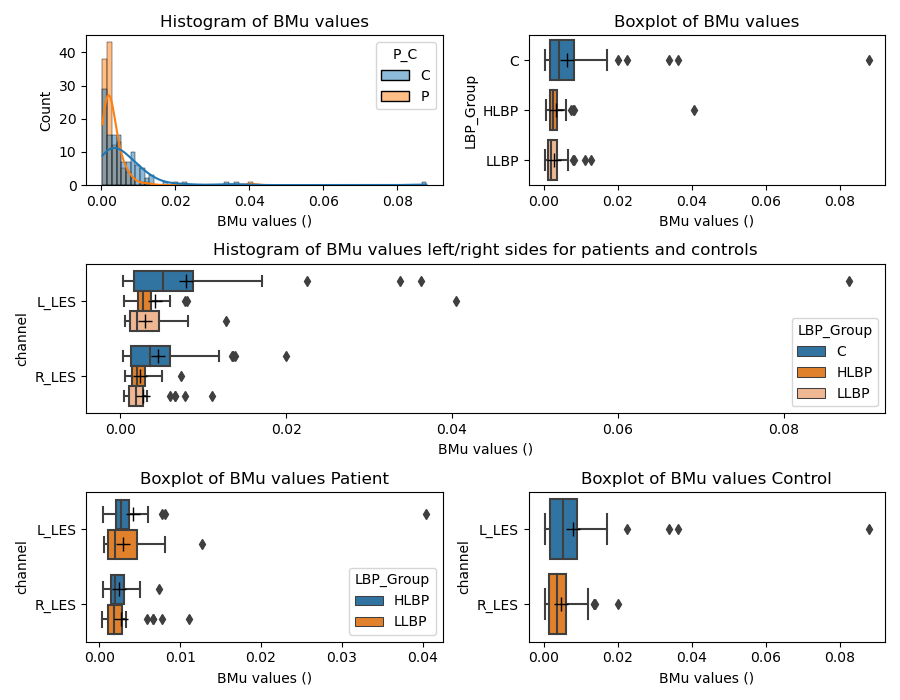

In [20]:
box_values_BMu_llbp_hlbp(BMu_values,outlier_present=True,save=False,name='',repo='',unit='',factor=1.5)

In [21]:
def BMu_remove_outlier_PC_2(BMu,factor=1.5): 
    BMu_P = BMu.loc[BMu['P_C'] == 'P']
    BMu_C = BMu.loc[BMu['P_C'] == 'C']

    Q1_p,Q3_p = BMu_P['value'].quantile(0.25),BMu_P['value'].quantile(0.75)
    Q1_c,Q3_c = BMu_C['value'].quantile(0.25),BMu_C['value'].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    IQR_c = Q3_c - Q1_c

    outliers = []
    for i,row in BMu.iterrows():
        if row['subject'] in SUBJECT_P:
            outliers += [ (row['value'] < (Q1_p - factor * IQR_p)) | (row['value'] > (Q3_p + factor * IQR_p)) ]
        if row['subject'] in SUBJECT_C:
            outliers += [( row['value'] < (Q1_c - factor * IQR_c)) | (row['value'] > (Q3_c + factor * IQR_c)) ]

    return np.array(outliers)

In [22]:
def BMu_remove_outlier_PC_0(BMu,factor=1.5): 
    BMu_P = BMu.loc[BMu['P_C'] == 'P']
    BMu_C = BMu.loc[BMu['P_C'] == 'C']

    def IRQ(BM,BMref,L):
        Q1 = BMref['value'].quantile(0.25) # BMref instead of BMu
        Q3 = BMref['value'].quantile(0.75)

        IQR = Q3 - Q1
        bool_list = ( (BM['value'] < (Q1 - factor * IQR)) | (BM['value'] > (Q3 + factor * IQR)) ) 
        bool_list = bool_list & (BM['P_C']==L)
        return  bool_list
    
    bool_P = IRQ(BMu,BMu_P,'P') # The values of the participants LBP are the references for Q1 and Q3
    bool_C = IRQ(BMu,BMu_C,'C')

    outliers = [ True if p or c else False for p,c in zip(bool_P , bool_C)]
    outliers = bool_P|bool_C

    return outliers

In [23]:
outliers_2 = BMu_remove_outlier_PC_2(BMu_values)
outliers_0 = BMu_remove_outlier_PC_0(BMu_values)

In [24]:
outliers_2_0 = list(zip(outliers_2,outliers_0))
np.sum([False if o0 == o2 else True for o0,o2 in outliers_2_0]) # = 0 ie the 2 list are equal

0

In [30]:
BMu_P = BMu_values.loc[BMu_values['P_C']=='P',:]

In [31]:
Q1 = BMu_P['value'].quantile(0.25) # BMref instead of BMu
Q3 = BMu_P['value'].quantile(0.75)
IQR = Q3 - Q1
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))  

-0.0020620130313586996 0.006797938940288099


In [25]:
BMu_values[outliers_2]

BM  subject P_C session           task  repetition channel     value  \
10   BMu1        3   C     REL  Trunk_Forward           1   L_LES  0.036251   
56   BMu1       17   P     INI  Trunk_Forward           1   L_LES  0.008087   
57   BMu1       17   P     INI  Trunk_Forward           1   R_LES  0.007326   
62   BMu1       21   C     REL  Trunk_Forward           1   L_LES  0.033683   
92   BMu1       29   P     INI  Trunk_Forward           1   L_LES  0.012706   
93   BMu1       29   P     INI  Trunk_Forward           1   R_LES  0.011041   
94   BMu1       29   P     REL  Trunk_Forward           1   L_LES  0.008098   
120  BMu1       38   C     INI  Trunk_Forward           1   L_LES  0.087855   
121  BMu1       38   C     INI  Trunk_Forward           1   R_LES  0.019984   
122  BMu1       38   C     REL  Trunk_Forward           1   L_LES  0.022453   
137  BMu1       42   P     INI  Trunk_Forward           1   R_LES  0.007748   
202  BMu1       58   P     REL  Trunk_Forward           1   L_LES  0.040455   
212  BMu1       62   P     INI  Trunk_Forward           1   L_LES  0.007756   

    LBP_Group  
10          C  
56       HLBP  
57       HLBP  
62          C  
92       LLBP  
93       LLBP  
94       LLBP  
120         C  
121         C  
122         C  
137      LLBP  
202      HLBP  
212      HLBP